In [ ]:
########################    Salary Prediction With Machine Learning     ######################## 

In [1]:
# Business Problem : The data set  includes the salary  and the career statistics of the baseball players at 1986.
                   # The goal is to develop a machine learning project for prediction of baseball players' salary.
    
# Dataset:

# AtBat: Number of hits  in the 1986-1987 season
# Hits: Number of hits in the 1986-1987 season 
# HmRun: Number of home runs in the 1986-1987 season
# Runs:  Number of runs in the 1986-1987 season
# RBI:Number of runs batted in in 1986
# Walks: Number of walks in 1986
# Years: Number of years in the major leagues
# CAtBat: Number of times at bat during his career
# CHits: Number of hits during his career
# CHmRun: Number of home runs during his career
# CRuns:  Number of runs during his career
# CRBI:  Number of runs batted in during his career
# CWalks: Number of walks during his career
# League: A factor with levels A and N indicating player's league at the end of 1986
# Division: A factor with levels E and W indicating player's division at the end of 1986
# PutOuts: Number of put outs in 1986
# Assits:  Number of assists in 1986
# Errors: Number of errors in 1986
# Salary: 1987 annual salary on opening day in thousands of dollars
# NewLeague: A factor with levels A and N indicating player's league at the beginning of 1987

   
    
    
import numpy as np
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score, validation_curve

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from pandas.core.common import SettingWithCopyWarning
from sklearn.exceptions import ConvergenceWarning

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action="ignore", category=ConvergenceWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [3]:
df = pd.read_csv(r"C:\Users\burcu\OneDrive\Masaüstü\DS Miiul\6.Machine Learning\DK\4. ALIŞTIRMA Loistik Regresyon\BONUS Maaş Tahmini\Tanıtım\hitters.csv")


In [4]:
#1. EDA

def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)

    print("##################### Types #####################")
    print(dataframe.dtypes)

    print("##################### Head #####################")
    print(dataframe.head(head))

    print("##################### Tail #####################")
    print(dataframe.tail(head))

    print("##################### NA #####################")
    print(dataframe.isnull().sum())

    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(322, 20)
##################### Types #####################
AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League        object
Division      object
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague     object
dtype: object
##################### Head #####################
   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague
0    293    66      1    30   29     14      1     293     66       1     30    29      14      A        E      446       33      20     nan         A
1    315    81      7    24   38     39     14    3449    835      69    321   414     375      N        

In [5]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
   
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)


Observations: 322
Variables: 20
cat_cols: 3
num_cols: 17
cat_but_car: 0
num_but_cat: 0


   League  Ratio
A     175 54.348
N     147 45.652
##########################################


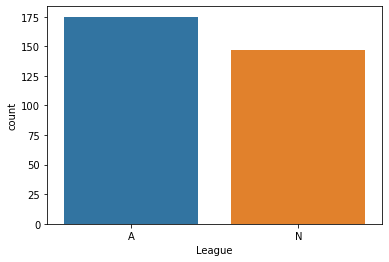

   Division  Ratio
W       165 51.242
E       157 48.758
##########################################


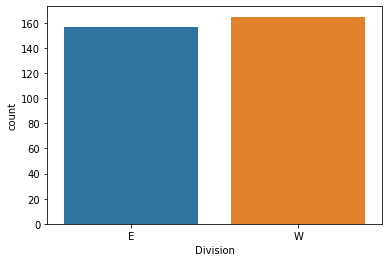

   NewLeague  Ratio
A        176 54.658
N        146 45.342
##########################################


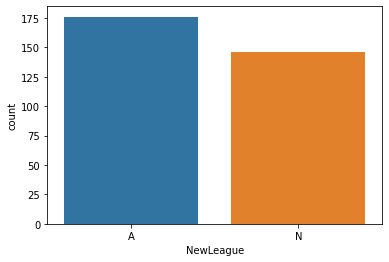

In [6]:
# 2. Analysis of Categorical Variables

def cat_summary(dataframe, col_name, plot=False):

    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

for col in cat_cols:
    cat_summary(df, col, plot=True)


count   322.000
mean    380.929
std     153.405
min      16.000
5%      161.000
10%     194.100
20%     221.800
30%     281.300
40%     321.800
50%     379.500
60%     430.200
70%     490.000
80%     535.600
90%     584.900
95%     609.900
99%     658.590
max     687.000
Name: AtBat, dtype: float64


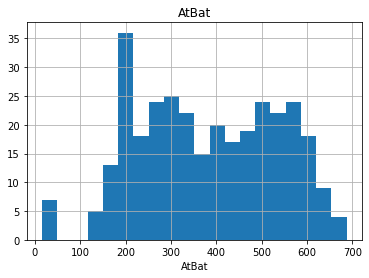

count   322.000
mean    101.025
std      46.455
min       1.000
5%       39.000
10%      45.100
20%      57.000
30%      70.000
40%      82.000
50%      96.000
60%     113.000
70%     128.700
80%     144.000
90%     163.000
95%     174.000
99%     210.790
max     238.000
Name: Hits, dtype: float64


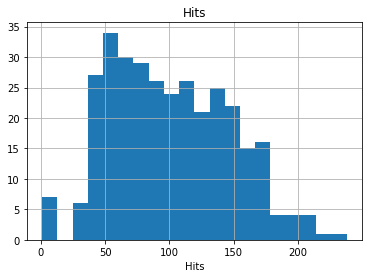

count   322.000
mean     10.770
std       8.709
min       0.000
5%        0.000
10%       1.000
20%       3.000
30%       5.000
40%       6.000
50%       8.000
60%      10.600
70%      14.000
80%      18.000
90%      24.000
95%      28.950
99%      33.000
max      40.000
Name: HmRun, dtype: float64


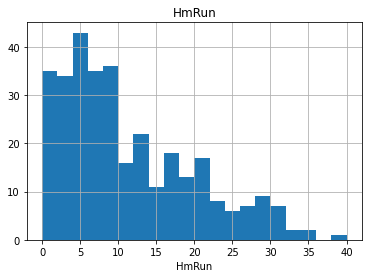

count   322.000
mean     50.910
std      26.024
min       0.000
5%       17.000
10%      20.100
20%      27.000
30%      33.000
40%      41.000
50%      48.000
60%      55.600
70%      66.000
80%      75.800
90%      89.000
95%      94.000
99%     107.790
max     130.000
Name: Runs, dtype: float64


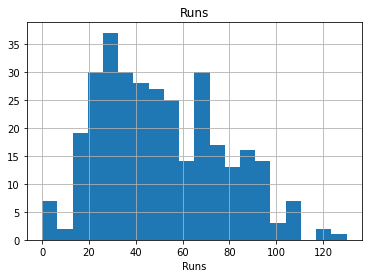

count   322.000
mean     48.028
std      26.167
min       0.000
5%       14.000
10%      19.000
20%      26.000
30%      30.000
40%      36.400
50%      44.000
60%      49.000
70%      58.000
80%      73.000
90%      86.000
95%      96.000
99%     112.370
max     121.000
Name: RBI, dtype: float64


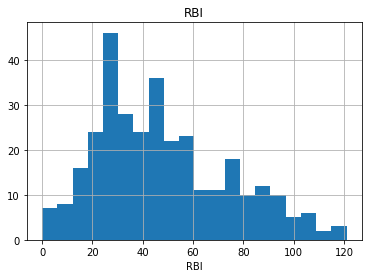

count   322.000
mean     38.742
std      21.639
min       0.000
5%       11.050
10%      15.000
20%      20.000
30%      24.000
40%      30.000
50%      35.000
60%      40.000
70%      48.700
80%      59.000
90%      69.900
95%      78.000
99%      93.580
max     105.000
Name: Walks, dtype: float64


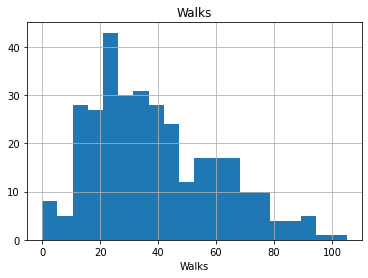

count   322.000
mean      7.444
std       4.926
min       1.000
5%        1.000
10%       2.000
20%       3.000
30%       4.000
40%       5.000
50%       6.000
60%       7.600
70%      10.000
80%      12.000
90%      15.000
95%      17.000
99%      19.790
max      24.000
Name: Years, dtype: float64


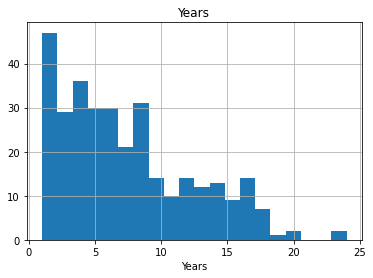

count     322.000
mean     2648.683
std      2324.206
min        19.000
5%        216.500
10%       342.200
20%       667.600
30%       963.400
40%      1402.200
50%      1928.000
60%      2654.000
70%      3365.000
80%      4483.000
90%      6123.400
95%      7125.600
99%      8749.970
max     14053.000
Name: CAtBat, dtype: float64


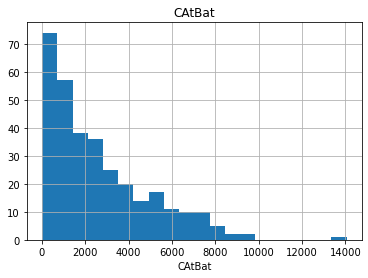

count    322.000
mean     717.571
std      654.473
min        4.000
5%        54.000
10%       86.000
20%      164.600
30%      238.000
40%      355.800
50%      508.000
60%      708.200
70%      911.100
80%     1229.200
90%     1659.600
95%     2017.150
99%     2500.340
max     4256.000
Name: CHits, dtype: float64


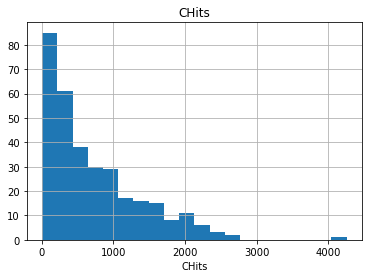

count   322.000
mean     69.491
std      86.266
min       0.000
5%        2.000
10%       4.000
20%      10.200
30%      16.300
40%      27.400
50%      37.500
60%      51.200
70%      72.400
80%     103.800
90%     194.900
95%     265.650
99%     373.120
max     548.000
Name: CHmRun, dtype: float64


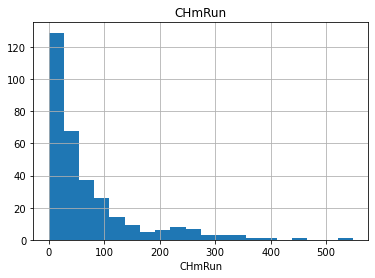

count    322.000
mean     358.795
std      334.106
min        1.000
5%        27.000
10%       38.100
20%       80.400
30%      117.300
40%      181.000
50%      247.000
60%      333.000
70%      443.400
80%      627.200
90%      895.700
95%     1032.300
99%     1174.370
max     2165.000
Name: CRuns, dtype: float64


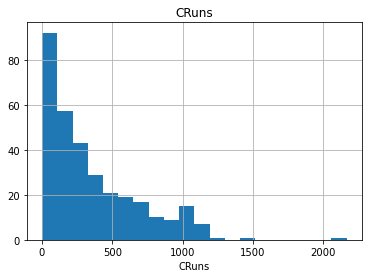

count    322.000
mean     330.118
std      333.220
min        0.000
5%        22.050
10%       34.100
20%       70.200
30%      106.300
40%      149.000
50%      220.500
60%      303.600
70%      379.100
80%      496.200
90%      861.600
95%     1071.750
99%     1310.850
max     1659.000
Name: CRBI, dtype: float64


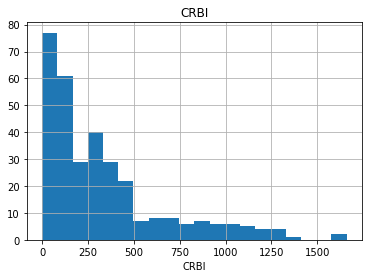

count    322.000
mean     260.239
std      267.058
min        0.000
5%        15.050
10%       30.100
20%       55.000
30%       82.000
40%      117.400
50%      170.500
60%      226.600
70%      300.700
80%      421.000
90%      643.900
95%      817.600
99%     1139.140
max     1566.000
Name: CWalks, dtype: float64


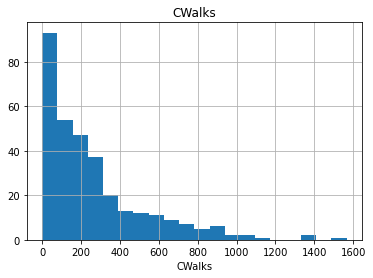

count    322.000
mean     288.938
std      280.705
min        0.000
5%        33.200
10%       62.200
20%       99.600
30%      132.000
40%      167.000
50%      212.000
60%      257.400
70%      303.000
80%      365.800
90%      685.600
95%      910.650
99%     1301.190
max     1378.000
Name: PutOuts, dtype: float64


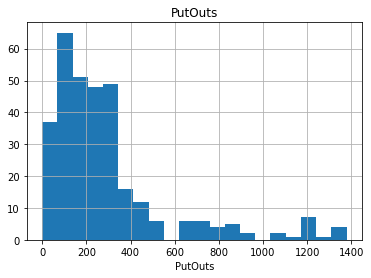

count   322.000
mean    106.913
std     136.855
min       0.000
5%        0.000
10%       2.000
20%       5.200
30%       9.000
40%      15.400
50%      39.500
60%      76.800
70%     134.800
80%     210.800
90%     353.300
95%     431.450
99%     478.160
max     492.000
Name: Assists, dtype: float64


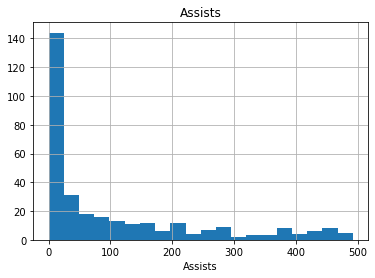

count   322.000
mean      8.040
std       6.368
min       0.000
5%        0.000
10%       1.000
20%       3.000
30%       4.000
40%       5.000
50%       6.000
60%       8.000
70%      10.000
80%      13.000
90%      17.000
95%      20.000
99%      25.790
max      32.000
Name: Errors, dtype: float64


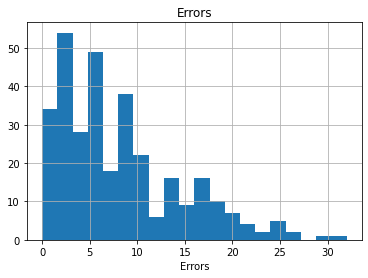

count    263.000
mean     535.926
std      451.119
min       67.500
5%        86.600
10%      100.000
20%      155.000
30%      221.000
40%      300.000
50%      425.000
60%      538.000
70%      700.000
80%      809.000
90%     1048.667
95%     1346.000
99%     2032.887
max     2460.000
Name: Salary, dtype: float64


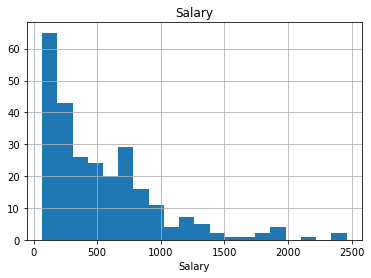

In [7]:
# 3. Analysis of Numerical Variables

def num_summary(dataframe, numerical_col, plot=False):

    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]

    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

for col in num_cols:
    num_summary(df, col, plot=True)



In [8]:
# 4. Analysis of Target Variable

def target_summary_with_cat(dataframe, target, categorical_col):

    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")

for col in cat_cols:
    target_summary_with_cat(df, "Salary", col)



        TARGET_MEAN
League             
A           542.000
N           529.117


          TARGET_MEAN
Division             
E             624.271
W             450.877


           TARGET_MEAN
NewLeague             
A              537.113
N              534.554




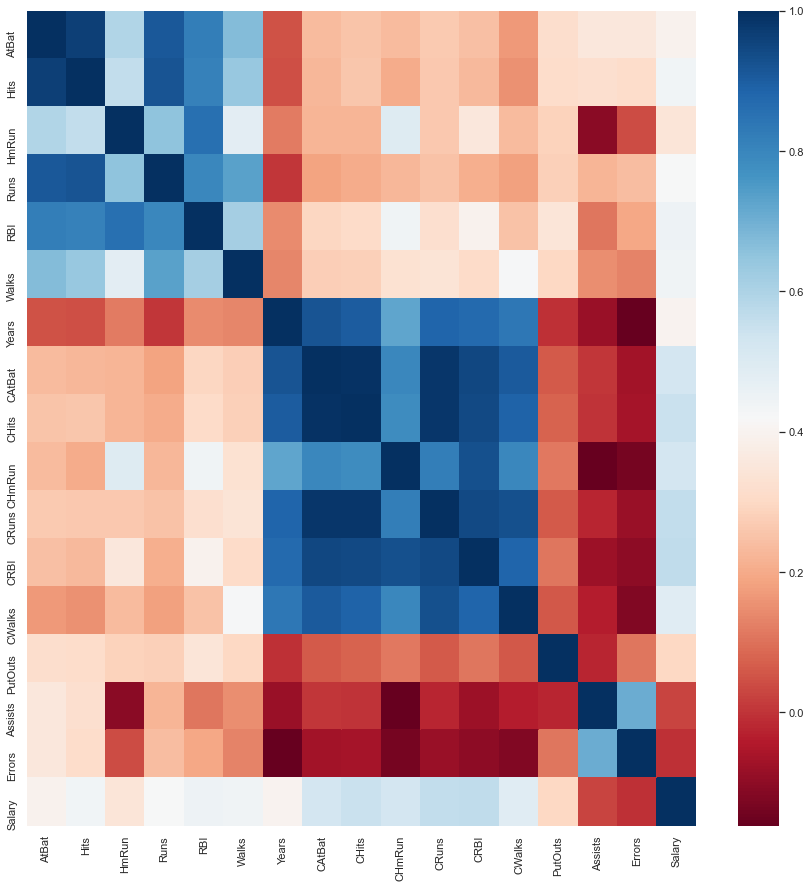

['Hits', 'Runs', 'CAtBat', 'CHits', 'CRuns', 'CRBI', 'CWalks']

In [9]:
# 5. Analysis of Correlation

def high_correlated_cols(dataframe, plot=False, corr_th=0.90):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu")
        plt.show()
    return drop_list

high_correlated_cols(df, plot=True)

In [10]:
####  ADVANCED FUNCTIONAL EDA

# 1. Outliers 


def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

for col in num_cols:
    print(col, check_outlier(df, col))

for col in num_cols:
    if check_outlier(df, col):
        replace_with_thresholds(df, col)


AtBat False
Hits False
HmRun True
Runs True
RBI True
Walks True
Years True
CAtBat True
CHits True
CHmRun True
CRuns True
CRBI True
CWalks True
PutOuts True
Assists True
Errors True
Salary True


In [11]:
# 2. Missing Values Eksik Değerler

def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns

missing_values_table(df)

df.dropna(inplace=True)



        n_miss  ratio
Salary      59 18.320


In [12]:
# 3. Feature Extraction

new_num_cols=[col for col in num_cols if col!="Salary"]

df[new_num_cols]=df[new_num_cols]+0.0000000001

df['NEW_Hits'] = df['Hits'] / df['CHits'] + df['Hits']
df['NEW_RBI'] = df['RBI'] / df['CRBI']
df['NEW_Walks'] = df['Walks'] / df['CWalks']
df['NEW_PutOuts'] = df['PutOuts'] * df['Years']
df["Hits_Success"] = (df["Hits"] / df["AtBat"]) * 100
df["NEW_CRBI*CATBAT"] = df['CRBI'] * df['CAtBat']
df["NEW_RBI"] = df["RBI"] / df["CRBI"]
df["NEW_Chits"] = df["CHits"] / df["Years"]
df["NEW_CHmRun"] = df["CHmRun"] * df["Years"]
df["NEW_CRuns"] = df["CRuns"] / df["Years"]
df["NEW_Chits"] = df["CHits"] * df["Years"]
df["NEW_RW"] = df["RBI"] * df["Walks"]
df["NEW_RBWALK"] = df["RBI"] / df["Walks"]
df["NEW_CH_CB"] = df["CHits"] / df["CAtBat"]
df["NEW_CHm_CAT"] = df["CHmRun"] / df["CAtBat"]
df['NEW_Diff_Atbat'] = df['AtBat'] - (df['CAtBat'] / df['Years'])
df['NEW_Diff_Hits'] = df['Hits'] - (df['CHits'] / df['Years'])
df['NEW_Diff_HmRun'] = df['HmRun'] - (df['CHmRun'] / df['Years'])
df['NEW_Diff_Runs'] = df['Runs'] - (df['CRuns'] / df['Years'])
df['NEW_Diff_RBI'] = df['RBI'] - (df['CRBI'] / df['Years'])
df['NEW_Diff_Walks'] = df['Walks'] - (df['CWalks'] / df['Years'])

In [13]:
# 4. One-Hot Encoding

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df = one_hot_encoder(df, cat_cols, drop_first=True)
df.head()


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,NEW_Hits,NEW_RBI,NEW_Walks,NEW_PutOuts,Hits_Success,NEW_CRBI*CATBAT,NEW_Chits,NEW_CHmRun,NEW_CRuns,NEW_RW,NEW_RBWALK,NEW_CH_CB,NEW_CHm_CAT,NEW_Diff_Atbat,NEW_Diff_Hits,NEW_Diff_HmRun,NEW_Diff_Runs,NEW_Diff_RBI,NEW_Diff_Walks,League_N,Division_W,NewLeague_N
1,315.000,81.000,7.000,24.000,38.000,39.000,14.000,3449.000,835.000,69.000,321.000,414.000,375.000,632.000,43.000,10.000,475.000,81.097,0.092,0.104,8848.000,25.714,1427886.000,11690.000,966.000,22.929,1482.000,0.974,0.242,0.020,68.643,21.357,2.071,1.071,8.429,12.214,1,1,1
2,479.000,130.000,18.000,66.000,72.000,76.000,3.000,1624.000,457.000,63.000,224.000,266.000,263.000,648.625,82.000,14.000,480.000,130.284,0.271,0.289,1945.875,27.140,431984.000,1371.000,189.000,74.667,5472.000,0.947,0.281,0.039,-62.333,-22.333,-3.000,-8.667,-16.667,-11.667,0,1,0
3,496.000,141.000,20.000,65.000,78.000,37.000,11.000,5628.000,1575.000,204.000,828.000,838.000,354.000,200.000,11.000,3.000,500.000,141.090,0.093,0.105,2200.000,28.427,4716264.000,17325.000,2244.000,75.273,2886.000,2.108,0.280,0.036,-15.636,-2.182,1.455,-10.273,1.818,4.818,1,0,1
4,321.000,87.000,10.000,39.000,42.000,30.000,2.000,396.000,101.000,12.000,48.000,46.000,33.000,648.625,40.000,4.000,91.500,87.861,0.913,0.909,1297.250,27.103,18216.000,202.000,24.000,24.000,1260.000,1.400,0.255,0.030,123.000,36.500,4.000,15.000,19.000,13.500,1,0,1
5,594.000,169.000,4.000,74.000,51.000,35.000,11.000,4408.000,1133.000,19.000,501.000,336.000,194.000,282.000,404.500,23.000,750.000,169.149,0.152,0.180,3102.000,28.451,1481088.000,12463.000,209.000,45.545,1785.000,1.457,0.257,0.004,193.273,66.000,2.273,28.455,20.455,17.364,0,1,0


In [14]:
# 5. Feature Scaling 

cat_cols, num_cols, cat_but_car = grab_col_names(df)

num_cols = [col for col in num_cols if col not in ["Salary"]]
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()


Observations: 263
Variables: 39
cat_cols: 3
num_cols: 36
cat_but_car: 0
num_but_cat: 3


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,NEW_Hits,NEW_RBI,NEW_Walks,NEW_PutOuts,Hits_Success,NEW_CRBI*CATBAT,NEW_Chits,NEW_CHmRun,NEW_CRuns,NEW_RW,NEW_RBWALK,NEW_CH_CB,NEW_CHm_CAT,NEW_Diff_Atbat,NEW_Diff_Hits,NEW_Diff_HmRun,NEW_Diff_Runs,NEW_Diff_RBI,NEW_Diff_Walks,League_N,Division_W,NewLeague_N
1,-0.603,-0.596,-0.530,-1.207,-0.522,-0.097,1.409,0.373,0.201,0.110,-0.113,0.366,0.592,2.072,-0.528,0.242,475.000,-0.601,-0.836,-0.793,3.327,-0.168,0.011,0.371,0.302,-1.063,-0.466,-0.580,-0.873,-0.273,-0.004,0.093,-0.280,-0.473,-0.213,0.155,1,1,1
2,0.513,0.492,0.738,0.442,0.795,1.615,-0.905,-0.461,-0.418,0.012,-0.425,-0.169,0.081,2.163,-0.242,0.877,480.000,0.492,-0.230,-0.149,0.056,0.277,-0.468,-0.617,-0.502,1.419,1.488,-0.613,0.805,1.012,-1.149,-1.229,-1.283,-1.010,-1.676,-1.501,0,1,0
3,0.628,0.736,0.969,0.403,1.027,-0.189,0.778,1.369,1.413,2.305,1.518,1.898,0.496,-0.301,-0.762,-0.871,500.000,0.732,-0.831,-0.791,0.176,0.679,1.594,0.910,1.624,1.448,0.221,0.782,0.739,0.838,-0.741,-0.619,-0.402,-1.098,-0.599,-0.358,1,0,1
4,-0.562,-0.462,-0.184,-0.618,-0.367,-0.513,-1.115,-1.022,-1.002,-0.817,-0.991,-0.964,-0.969,2.163,-0.550,-0.712,91.500,-0.451,1.943,2.008,-0.252,0.265,-0.668,-0.729,-0.673,-1.011,-0.575,-0.069,-0.320,0.432,0.471,0.551,0.101,0.295,0.403,0.244,1,0,1
5,1.295,1.358,-0.876,0.757,-0.019,-0.282,0.778,0.812,0.689,-0.704,0.466,0.084,-0.234,0.150,2.118,2.307,750.000,1.355,-0.633,-0.527,0.604,0.686,0.037,0.445,-0.481,0.022,-0.318,-0.000,-0.235,-1.346,1.086,1.443,-0.240,1.036,0.488,0.512,0,1,0


In [15]:
# Base Models

y = df["Salary"]
X = df.drop(["Salary"], axis=1)

models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor()),
          ("CatBoost", CatBoostRegressor(verbose=False))]


for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=10, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

RMSE: 236.0151 (LR) 
RMSE: 232.0914 (Ridge) 
RMSE: 230.1802 (Lasso) 
RMSE: 256.2534 (ElasticNet) 
RMSE: 253.4936 (KNN) 
RMSE: 279.9548 (CART) 
RMSE: 209.4409 (RF) 
RMSE: 398.3709 (SVR) 
RMSE: 200.958 (GBM) 
RMSE: 235.3938 (XGBoost) 
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2430
[LightGBM] [Info] Number of data points in the train set: 236, number of used features: 38
[LightGBM] [Info] Start training from score 525.722458
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2427
[LightGBM] [Info] Number of data points in the train set: 236, number of used features: 38
[LightGBM] [Info] Start training from score 503.051453
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000300 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2438
[LightGBM] [Info] Number of data points in the train set: 237, number of used features: 38
[LightGBM] [Info] Start training from score 522.494274
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [ ]:
# RMSE: 236.0151 (LR) 
# RMSE: 232.0914 (Ridge) 
# RMSE: 230.1802 (Lasso) 
# RMSE: 256.2534 (ElasticNet) 
# RMSE: 253.4936 (KNN) 
# RMSE: 279.9548 (CART) 
# RMSE: 209.4409 (RF) 
# RMSE: 398.3709 (SVR) 
# RMSE: 200.958 (GBM) 
# RMSE: 235.3938 (XGBoost) 
# RMSE: 228.8917 (LightGBM) 

In [16]:
# Random Forest

rf_model = RandomForestRegressor(random_state=17)

rf_params = {"max_depth": [5, 8, 15, None],
             "max_features": [5, 7, "auto"],
             "min_samples_split": [8, 15, 20],
             "n_estimators": [200, 500]}

rf_best_grid = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)
rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X, y)
rmse = np.mean(np.sqrt(-cross_val_score(rf_final, X, y, cv=10, scoring="neg_mean_squared_error")))

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [17]:
rmse

205.76321622977406

In [18]:
# GBM Model

gbm_model = GradientBoostingRegressor(random_state=17)

gbm_params = {"learning_rate": [0.01, 0.1],
              "max_depth": [3, 8],
              "n_estimators": [500, 1000],
              "subsample": [1, 0.5, 0.7]}

gbm_best_grid = GridSearchCV(gbm_model, gbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)
gbm_final = gbm_model.set_params(**gbm_best_grid.best_params_, random_state=17, ).fit(X, y)
rmse = np.mean(np.sqrt(-cross_val_score(gbm_final, X, y, cv=10, scoring="neg_mean_squared_error")))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [19]:
rmse

201.5527028918753

In [20]:
# LightGBM

lgbm_model = LGBMRegressor(random_state=17)

lgbm_params = {"learning_rate": [0.01, 0.1],
                "n_estimators": [300, 500],
                "colsample_bytree": [0.7, 1]}

lgbm_best_grid = GridSearchCV(lgbm_model, lgbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)
lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_, random_state=17).fit(X, y)
rmse = np.mean(np.sqrt(-cross_val_score(lgbm_final, X, y, cv=10, scoring="neg_mean_squared_error")))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000477 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2663
[LightGBM] [Info] Number of data points in the train set: 263, number of used features: 38
[LightGBM] [Info] Start training from score 520.025259
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [21]:
rmse

223.25086589452295

In [22]:
# CatBoost

catboost_model = CatBoostRegressor(random_state=17, verbose=False)

catboost_params = {"iterations": [200, 500],
                   "learning_rate": [0.01, 0.1],
                   "depth": [3, 6]}

catboost_best_grid = GridSearchCV(catboost_model, catboost_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)
catboost_final = catboost_model.set_params(**catboost_best_grid.best_params_, random_state=17).fit(X, y)
rmse = np.mean(np.sqrt(-cross_val_score(catboost_final, X, y, cv=10, scoring="neg_mean_squared_error")))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [23]:
rmse

210.40896582670925

In [24]:
#  Automated Hyperparameter Optimization

rf_params = {"max_depth": [5, 8, 15, None],
             "max_features": [5, 7, "auto"],
             "min_samples_split": [8, 15, 20],
             "n_estimators": [200, 500]}

gbm_params = {"learning_rate": [0.01, 0.1],
              "max_depth": [3, 8],
              "n_estimators": [500, 1000],
              "subsample": [1, 0.5, 0.7]}


lightgbm_params = {"learning_rate": [0.01, 0.1],
                   "n_estimators": [300, 500],
                   "colsample_bytree": [0.7, 1]}

catboost_params = {"iterations": [200, 500],
                   "learning_rate": [0.01, 0.1],
                   "depth": [3, 6]}


regressors = [("RF", RandomForestRegressor(), rf_params),
              ('GBM', GradientBoostingRegressor(), gbm_params),
              ('LightGBM', LGBMRegressor(), lightgbm_params),
              ("CatBoost", CatBoostRegressor(), catboost_params)]


best_models = {}


In [25]:
for name, regressor, params in regressors:
    print(f"########## {name} ##########")
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=10, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

    gs_best = GridSearchCV(regressor, params, cv=3, n_jobs=-1, verbose=False).fit(X, y)

    final_model = regressor.set_params(**gs_best.best_params_)
    rmse = np.mean(np.sqrt(-cross_val_score(final_model, X, y, cv=10, scoring="neg_mean_squared_error")))
    print(f"RMSE (After): {round(rmse, 4)} ({name}) ")

    print(f"{name} best params: {gs_best.best_params_}", end="\n\n")

    best_models[name] = final_model



########## RF ##########
RMSE: 206.9814 (RF) 
RMSE (After): 204.6733 (RF) 
RF best params: {'max_depth': 15, 'max_features': 'auto', 'min_samples_split': 8, 'n_estimators': 500}

########## GBM ##########
RMSE: 199.9548 (GBM) 
RMSE (After): 203.3714 (GBM) 
GBM best params: {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 1000, 'subsample': 0.7}

########## LightGBM ##########
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000219 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2430
[LightGBM] [Info] Number of data points in the train set: 236, number of used features: 38
[LightGBM] [Info] Start training from score 525.722458
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2434
[LightGBM] [Info] Number of data points in the train set: 237, number of used features: 38
[LightGBM] [Info] Start training from score 514.127890
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2437
[LightGBM] [Info] Number of data points in the train set: 237, number of used features: 38
[LightGBM] [Info] Start training from score 533.920431
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000307 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2663
[LightGBM] [Info] Number of data points in the train set: 263, number of used features: 38
[LightGBM] [Info] Start training from score 520.025259
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000286 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2430
[LightGBM] [Info] Number of data points in the train set: 236, number of used features: 38
[LightGBM] [Info] Start training from score 525.722458
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000304 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2434
[LightGBM] [Info] Number of data points in the train set: 237, number of used features: 38
[LightGBM] [Info] Start training from score 514.127890
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2438
[LightGBM] [Info] Number of data points in the train set: 237, number of used features: 38
[LightGBM] [Info] Start training from score 522.494274
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2437
[LightGBM] [Info] Number of data points in the train set: 237, number of used features: 38
[LightGBM] [Info] Start training from score 533.920431
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

0:	learn: 403.3340596	total: 5.75ms	remaining: 5.74s
1:	learn: 397.0460523	total: 9.9ms	remaining: 4.94s
2:	learn: 390.8226218	total: 14.1ms	remaining: 4.69s
3:	learn: 384.5883790	total: 19.2ms	remaining: 4.78s
4:	learn: 378.6544455	total: 24.5ms	remaining: 4.88s
5:	learn: 372.5626807	total: 29.2ms	remaining: 4.84s
6:	learn: 366.3399869	total: 34.6ms	remaining: 4.91s
7:	learn: 360.5902593	total: 39.7ms	remaining: 4.92s
8:	learn: 355.2793833	total: 44.1ms	remaining: 4.86s
9:	learn: 349.8434345	total: 49ms	remaining: 4.85s
10:	learn: 345.4037124	total: 54.6ms	remaining: 4.91s
11:	learn: 340.7879422	total: 59.9ms	remaining: 4.93s
12:	learn: 336.1259848	total: 65.3ms	remaining: 4.96s
13:	learn: 331.1630357	total: 69.9ms	remaining: 4.92s
14:	learn: 326.2436212	total: 74.5ms	remaining: 4.89s
15:	learn: 322.1460542	total: 79.5ms	remaining: 4.89s
16:	learn: 317.5360770	total: 84.1ms	remaining: 4.86s
17:	learn: 313.8951056	total: 89ms	remaining: 4.85s
18:	learn: 309.8293036	total: 94.3ms	remain

184:	learn: 118.1611192	total: 838ms	remaining: 3.69s
185:	learn: 117.9668411	total: 843ms	remaining: 3.69s
186:	learn: 117.6855382	total: 847ms	remaining: 3.68s
187:	learn: 117.3632450	total: 852ms	remaining: 3.68s
188:	learn: 116.9048822	total: 857ms	remaining: 3.68s
189:	learn: 116.4944454	total: 863ms	remaining: 3.68s
190:	learn: 115.8402716	total: 867ms	remaining: 3.67s
191:	learn: 115.6019456	total: 871ms	remaining: 3.66s
192:	learn: 115.3853404	total: 874ms	remaining: 3.66s
193:	learn: 115.2062120	total: 878ms	remaining: 3.65s
194:	learn: 114.6941202	total: 882ms	remaining: 3.64s
195:	learn: 114.3632075	total: 887ms	remaining: 3.64s
196:	learn: 114.0140764	total: 891ms	remaining: 3.63s
197:	learn: 113.8686434	total: 896ms	remaining: 3.63s
198:	learn: 113.6486639	total: 900ms	remaining: 3.62s
199:	learn: 113.0507384	total: 904ms	remaining: 3.62s
200:	learn: 112.4917584	total: 908ms	remaining: 3.61s
201:	learn: 112.1992564	total: 912ms	remaining: 3.6s
202:	learn: 111.7956144	total

342:	learn: 69.1077867	total: 1.5s	remaining: 2.87s
343:	learn: 68.8994546	total: 1.5s	remaining: 2.87s
344:	learn: 68.6812317	total: 1.51s	remaining: 2.87s
345:	learn: 68.5727282	total: 1.51s	remaining: 2.86s
346:	learn: 68.5227385	total: 1.52s	remaining: 2.86s
347:	learn: 68.4578414	total: 1.52s	remaining: 2.85s
348:	learn: 68.1991800	total: 1.53s	remaining: 2.85s
349:	learn: 68.0755817	total: 1.53s	remaining: 2.85s
350:	learn: 67.8478679	total: 1.54s	remaining: 2.84s
351:	learn: 67.4118379	total: 1.54s	remaining: 2.84s
352:	learn: 67.0600095	total: 1.55s	remaining: 2.83s
353:	learn: 66.7615006	total: 1.55s	remaining: 2.83s
354:	learn: 66.6006989	total: 1.55s	remaining: 2.83s
355:	learn: 66.3296474	total: 1.56s	remaining: 2.82s
356:	learn: 66.1753985	total: 1.56s	remaining: 2.82s
357:	learn: 65.9599696	total: 1.57s	remaining: 2.81s
358:	learn: 65.5631834	total: 1.57s	remaining: 2.81s
359:	learn: 65.4695814	total: 1.58s	remaining: 2.8s
360:	learn: 65.2250792	total: 1.58s	remaining: 2.

498:	learn: 43.1758185	total: 2.16s	remaining: 2.17s
499:	learn: 43.0574530	total: 2.16s	remaining: 2.16s
500:	learn: 42.8255705	total: 2.17s	remaining: 2.16s
501:	learn: 42.6901927	total: 2.17s	remaining: 2.15s
502:	learn: 42.6420813	total: 2.18s	remaining: 2.15s
503:	learn: 42.4542424	total: 2.18s	remaining: 2.15s
504:	learn: 42.2580755	total: 2.18s	remaining: 2.14s
505:	learn: 42.1067756	total: 2.19s	remaining: 2.14s
506:	learn: 41.9964371	total: 2.19s	remaining: 2.13s
507:	learn: 41.8051715	total: 2.2s	remaining: 2.13s
508:	learn: 41.6486406	total: 2.2s	remaining: 2.12s
509:	learn: 41.5831086	total: 2.21s	remaining: 2.12s
510:	learn: 41.5266483	total: 2.21s	remaining: 2.12s
511:	learn: 41.3224049	total: 2.22s	remaining: 2.11s
512:	learn: 41.2409954	total: 2.22s	remaining: 2.11s
513:	learn: 41.1089448	total: 2.23s	remaining: 2.1s
514:	learn: 40.9492940	total: 2.23s	remaining: 2.1s
515:	learn: 40.9076689	total: 2.24s	remaining: 2.1s
516:	learn: 40.6746426	total: 2.24s	remaining: 2.09

677:	learn: 24.1189227	total: 2.99s	remaining: 1.42s
678:	learn: 24.0497148	total: 3s	remaining: 1.42s
679:	learn: 23.9546325	total: 3s	remaining: 1.41s
680:	learn: 23.8613807	total: 3.01s	remaining: 1.41s
681:	learn: 23.8111952	total: 3.01s	remaining: 1.4s
682:	learn: 23.6568370	total: 3.02s	remaining: 1.4s
683:	learn: 23.5542409	total: 3.02s	remaining: 1.4s
684:	learn: 23.4646151	total: 3.02s	remaining: 1.39s
685:	learn: 23.3611156	total: 3.03s	remaining: 1.39s
686:	learn: 23.3019682	total: 3.03s	remaining: 1.38s
687:	learn: 23.2588256	total: 3.04s	remaining: 1.38s
688:	learn: 23.2160347	total: 3.04s	remaining: 1.37s
689:	learn: 23.1009124	total: 3.04s	remaining: 1.37s
690:	learn: 23.0924703	total: 3.05s	remaining: 1.36s
691:	learn: 22.9706852	total: 3.05s	remaining: 1.36s
692:	learn: 22.9600178	total: 3.06s	remaining: 1.35s
693:	learn: 22.8717822	total: 3.06s	remaining: 1.35s
694:	learn: 22.7651317	total: 3.06s	remaining: 1.34s
695:	learn: 22.7370048	total: 3.07s	remaining: 1.34s
69

861:	learn: 13.4785027	total: 3.83s	remaining: 614ms
862:	learn: 13.4166647	total: 3.84s	remaining: 609ms
863:	learn: 13.4107962	total: 3.84s	remaining: 605ms
864:	learn: 13.3686353	total: 3.85s	remaining: 600ms
865:	learn: 13.3167610	total: 3.85s	remaining: 596ms
866:	learn: 13.2864827	total: 3.85s	remaining: 592ms
867:	learn: 13.2318751	total: 3.86s	remaining: 587ms
868:	learn: 13.2006830	total: 3.86s	remaining: 582ms
869:	learn: 13.1571826	total: 3.87s	remaining: 578ms
870:	learn: 13.0948726	total: 3.87s	remaining: 573ms
871:	learn: 13.0509783	total: 3.88s	remaining: 569ms
872:	learn: 13.0142835	total: 3.88s	remaining: 564ms
873:	learn: 12.9958919	total: 3.88s	remaining: 560ms
874:	learn: 12.9755853	total: 3.89s	remaining: 555ms
875:	learn: 12.9480656	total: 3.89s	remaining: 551ms
876:	learn: 12.9030483	total: 3.9s	remaining: 546ms
877:	learn: 12.8957604	total: 3.9s	remaining: 542ms
878:	learn: 12.8760345	total: 3.9s	remaining: 537ms
879:	learn: 12.8499247	total: 3.91s	remaining: 53

37:	learn: 247.4298836	total: 173ms	remaining: 4.37s
38:	learn: 245.2318497	total: 177ms	remaining: 4.37s
39:	learn: 242.5789318	total: 182ms	remaining: 4.37s
40:	learn: 239.9172741	total: 186ms	remaining: 4.36s
41:	learn: 237.3983050	total: 192ms	remaining: 4.38s
42:	learn: 235.5340841	total: 196ms	remaining: 4.37s
43:	learn: 232.9149847	total: 200ms	remaining: 4.35s
44:	learn: 231.2636995	total: 204ms	remaining: 4.34s
45:	learn: 229.1200002	total: 208ms	remaining: 4.32s
46:	learn: 226.9516490	total: 212ms	remaining: 4.3s
47:	learn: 225.2001271	total: 216ms	remaining: 4.29s
48:	learn: 223.2416989	total: 220ms	remaining: 4.28s
49:	learn: 221.6113596	total: 224ms	remaining: 4.26s
50:	learn: 219.7279596	total: 228ms	remaining: 4.25s
51:	learn: 217.7140285	total: 232ms	remaining: 4.23s
52:	learn: 216.0318379	total: 236ms	remaining: 4.22s
53:	learn: 214.3412895	total: 240ms	remaining: 4.21s
54:	learn: 212.7677380	total: 244ms	remaining: 4.2s
55:	learn: 211.2639896	total: 248ms	remaining: 4

194:	learn: 117.9223071	total: 841ms	remaining: 3.47s
195:	learn: 117.1293304	total: 846ms	remaining: 3.47s
196:	learn: 116.3985670	total: 852ms	remaining: 3.47s
197:	learn: 116.0826540	total: 858ms	remaining: 3.48s
198:	learn: 115.6743710	total: 863ms	remaining: 3.47s
199:	learn: 115.2238768	total: 868ms	remaining: 3.47s
200:	learn: 114.7276924	total: 873ms	remaining: 3.47s
201:	learn: 114.2367518	total: 879ms	remaining: 3.47s
202:	learn: 113.9831474	total: 884ms	remaining: 3.47s
203:	learn: 113.7917125	total: 890ms	remaining: 3.47s
204:	learn: 113.3753473	total: 894ms	remaining: 3.47s
205:	learn: 113.0744937	total: 899ms	remaining: 3.46s
206:	learn: 112.5208895	total: 904ms	remaining: 3.46s
207:	learn: 112.2650568	total: 908ms	remaining: 3.46s
208:	learn: 111.7999028	total: 912ms	remaining: 3.45s
209:	learn: 111.5852082	total: 916ms	remaining: 3.44s
210:	learn: 111.4072953	total: 920ms	remaining: 3.44s
211:	learn: 111.0940208	total: 923ms	remaining: 3.43s
212:	learn: 110.8850293	tota

387:	learn: 58.4233081	total: 1.67s	remaining: 2.63s
388:	learn: 58.1798067	total: 1.68s	remaining: 2.63s
389:	learn: 57.9179657	total: 1.68s	remaining: 2.63s
390:	learn: 57.6826886	total: 1.69s	remaining: 2.63s
391:	learn: 57.5091020	total: 1.69s	remaining: 2.62s
392:	learn: 57.3348671	total: 1.7s	remaining: 2.62s
393:	learn: 57.0295944	total: 1.7s	remaining: 2.62s
394:	learn: 56.9237503	total: 1.71s	remaining: 2.61s
395:	learn: 56.8857586	total: 1.71s	remaining: 2.61s
396:	learn: 56.6022089	total: 1.72s	remaining: 2.6s
397:	learn: 56.3079083	total: 1.72s	remaining: 2.6s
398:	learn: 56.1267424	total: 1.72s	remaining: 2.6s
399:	learn: 56.0664994	total: 1.73s	remaining: 2.59s
400:	learn: 55.8036730	total: 1.73s	remaining: 2.59s
401:	learn: 55.4157572	total: 1.74s	remaining: 2.59s
402:	learn: 55.0274734	total: 1.74s	remaining: 2.58s
403:	learn: 54.9229190	total: 1.75s	remaining: 2.58s
404:	learn: 54.6912327	total: 1.75s	remaining: 2.58s
405:	learn: 54.4573715	total: 1.76s	remaining: 2.57

543:	learn: 33.1147987	total: 2.34s	remaining: 1.96s
544:	learn: 32.9285012	total: 2.34s	remaining: 1.96s
545:	learn: 32.7888260	total: 2.35s	remaining: 1.95s
546:	learn: 32.6413356	total: 2.35s	remaining: 1.95s
547:	learn: 32.4674791	total: 2.36s	remaining: 1.94s
548:	learn: 32.4462488	total: 2.36s	remaining: 1.94s
549:	learn: 32.3398893	total: 2.37s	remaining: 1.94s
550:	learn: 32.1721756	total: 2.37s	remaining: 1.93s
551:	learn: 32.0484849	total: 2.37s	remaining: 1.93s
552:	learn: 31.9693158	total: 2.38s	remaining: 1.92s
553:	learn: 31.7839848	total: 2.38s	remaining: 1.92s
554:	learn: 31.6322058	total: 2.39s	remaining: 1.91s
555:	learn: 31.5346614	total: 2.39s	remaining: 1.91s
556:	learn: 31.4870005	total: 2.4s	remaining: 1.91s
557:	learn: 31.3564270	total: 2.4s	remaining: 1.9s
558:	learn: 31.2305668	total: 2.4s	remaining: 1.9s
559:	learn: 31.1164515	total: 2.41s	remaining: 1.89s
560:	learn: 30.9909958	total: 2.41s	remaining: 1.89s
561:	learn: 30.9707999	total: 2.42s	remaining: 1.88

705:	learn: 20.1435385	total: 3.01s	remaining: 1.25s
706:	learn: 20.0712517	total: 3.02s	remaining: 1.25s
707:	learn: 20.0429945	total: 3.03s	remaining: 1.25s
708:	learn: 19.9689564	total: 3.04s	remaining: 1.25s
709:	learn: 19.9530807	total: 3.04s	remaining: 1.24s
710:	learn: 19.9012762	total: 3.04s	remaining: 1.24s
711:	learn: 19.8802493	total: 3.05s	remaining: 1.23s
712:	learn: 19.8124801	total: 3.05s	remaining: 1.23s
713:	learn: 19.7231294	total: 3.06s	remaining: 1.23s
714:	learn: 19.6386199	total: 3.06s	remaining: 1.22s
715:	learn: 19.6209684	total: 3.07s	remaining: 1.22s
716:	learn: 19.5650075	total: 3.07s	remaining: 1.21s
717:	learn: 19.5346084	total: 3.08s	remaining: 1.21s
718:	learn: 19.5177796	total: 3.08s	remaining: 1.21s
719:	learn: 19.4560123	total: 3.09s	remaining: 1.2s
720:	learn: 19.4122487	total: 3.09s	remaining: 1.2s
721:	learn: 19.3273369	total: 3.1s	remaining: 1.19s
722:	learn: 19.3147827	total: 3.1s	remaining: 1.19s
723:	learn: 19.2539244	total: 3.11s	remaining: 1.1

886:	learn: 11.7436870	total: 3.83s	remaining: 489ms
887:	learn: 11.7095375	total: 3.84s	remaining: 484ms
888:	learn: 11.6606509	total: 3.84s	remaining: 480ms
889:	learn: 11.6129937	total: 3.85s	remaining: 476ms
890:	learn: 11.5710028	total: 3.85s	remaining: 472ms
891:	learn: 11.5316704	total: 3.86s	remaining: 467ms
892:	learn: 11.5124139	total: 3.86s	remaining: 463ms
893:	learn: 11.4761599	total: 3.87s	remaining: 459ms
894:	learn: 11.4172941	total: 3.87s	remaining: 454ms
895:	learn: 11.3889387	total: 3.88s	remaining: 450ms
896:	learn: 11.3443900	total: 3.88s	remaining: 445ms
897:	learn: 11.3295115	total: 3.88s	remaining: 441ms
898:	learn: 11.3034185	total: 3.89s	remaining: 437ms
899:	learn: 11.2786161	total: 3.89s	remaining: 432ms
900:	learn: 11.2547600	total: 3.9s	remaining: 428ms
901:	learn: 11.2501437	total: 3.9s	remaining: 424ms
902:	learn: 11.2318678	total: 3.9s	remaining: 419ms
903:	learn: 11.1903368	total: 3.91s	remaining: 415ms
904:	learn: 11.1551239	total: 3.91s	remaining: 41

78:	learn: 174.9699177	total: 342ms	remaining: 3.98s
79:	learn: 173.6608830	total: 346ms	remaining: 3.98s
80:	learn: 172.4551870	total: 351ms	remaining: 3.98s
81:	learn: 171.5302393	total: 355ms	remaining: 3.98s
82:	learn: 170.5847494	total: 371ms	remaining: 4.1s
83:	learn: 169.6777328	total: 377ms	remaining: 4.11s
84:	learn: 169.1733813	total: 384ms	remaining: 4.13s
85:	learn: 168.1070386	total: 388ms	remaining: 4.13s
86:	learn: 167.0741487	total: 393ms	remaining: 4.12s
87:	learn: 165.8421365	total: 397ms	remaining: 4.12s
88:	learn: 165.0718933	total: 401ms	remaining: 4.11s
89:	learn: 164.2062509	total: 405ms	remaining: 4.1s
90:	learn: 163.4334488	total: 409ms	remaining: 4.09s
91:	learn: 162.5782351	total: 413ms	remaining: 4.08s
92:	learn: 161.9753010	total: 417ms	remaining: 4.07s
93:	learn: 161.1263083	total: 421ms	remaining: 4.06s
94:	learn: 160.4446809	total: 425ms	remaining: 4.05s
95:	learn: 159.6413891	total: 429ms	remaining: 4.04s
96:	learn: 158.8088549	total: 433ms	remaining: 4

265:	learn: 82.7676937	total: 1.18s	remaining: 3.27s
266:	learn: 82.4062293	total: 1.19s	remaining: 3.26s
267:	learn: 82.2830229	total: 1.19s	remaining: 3.26s
268:	learn: 82.0026102	total: 1.2s	remaining: 3.26s
269:	learn: 81.8834411	total: 1.2s	remaining: 3.25s
270:	learn: 81.5152250	total: 1.21s	remaining: 3.26s
271:	learn: 81.0652506	total: 1.22s	remaining: 3.25s
272:	learn: 80.6945768	total: 1.22s	remaining: 3.25s
273:	learn: 80.2541844	total: 1.23s	remaining: 3.25s
274:	learn: 80.1661260	total: 1.23s	remaining: 3.24s
275:	learn: 80.0744340	total: 1.23s	remaining: 3.23s
276:	learn: 79.9676934	total: 1.24s	remaining: 3.23s
277:	learn: 79.4662765	total: 1.24s	remaining: 3.23s
278:	learn: 79.1078958	total: 1.25s	remaining: 3.22s
279:	learn: 78.9764654	total: 1.25s	remaining: 3.21s
280:	learn: 78.6906162	total: 1.25s	remaining: 3.21s
281:	learn: 78.3938981	total: 1.26s	remaining: 3.2s
282:	learn: 77.8959188	total: 1.26s	remaining: 3.2s
283:	learn: 77.4906655	total: 1.26s	remaining: 3.1

450:	learn: 43.9747458	total: 2s	remaining: 2.43s
451:	learn: 43.7445681	total: 2s	remaining: 2.43s
452:	learn: 43.6052376	total: 2.01s	remaining: 2.42s
453:	learn: 43.5753681	total: 2.01s	remaining: 2.42s
454:	learn: 43.4167786	total: 2.02s	remaining: 2.42s
455:	learn: 43.3274434	total: 2.02s	remaining: 2.42s
456:	learn: 43.1366599	total: 2.03s	remaining: 2.41s
457:	learn: 42.8801202	total: 2.03s	remaining: 2.41s
458:	learn: 42.7124541	total: 2.04s	remaining: 2.4s
459:	learn: 42.5480009	total: 2.04s	remaining: 2.4s
460:	learn: 42.4549823	total: 2.05s	remaining: 2.39s
461:	learn: 42.3442095	total: 2.05s	remaining: 2.39s
462:	learn: 42.2675210	total: 2.06s	remaining: 2.38s
463:	learn: 42.0659355	total: 2.06s	remaining: 2.38s
464:	learn: 41.8824170	total: 2.07s	remaining: 2.38s
465:	learn: 41.8537261	total: 2.07s	remaining: 2.37s
466:	learn: 41.7889681	total: 2.08s	remaining: 2.37s
467:	learn: 41.7643320	total: 2.08s	remaining: 2.37s
468:	learn: 41.6370466	total: 2.08s	remaining: 2.36s
4

646:	learn: 22.6336081	total: 2.84s	remaining: 1.55s
647:	learn: 22.5631095	total: 2.84s	remaining: 1.54s
648:	learn: 22.4660417	total: 2.85s	remaining: 1.54s
649:	learn: 22.3611922	total: 2.85s	remaining: 1.54s
650:	learn: 22.2823007	total: 2.86s	remaining: 1.53s
651:	learn: 22.2087092	total: 2.86s	remaining: 1.53s
652:	learn: 22.1063463	total: 2.87s	remaining: 1.52s
653:	learn: 22.0700052	total: 2.87s	remaining: 1.52s
654:	learn: 21.9713042	total: 2.88s	remaining: 1.52s
655:	learn: 21.9008869	total: 2.88s	remaining: 1.51s
656:	learn: 21.8367495	total: 2.89s	remaining: 1.51s
657:	learn: 21.7359984	total: 2.89s	remaining: 1.5s
658:	learn: 21.6530497	total: 2.9s	remaining: 1.5s
659:	learn: 21.5981224	total: 2.9s	remaining: 1.49s
660:	learn: 21.5221471	total: 2.9s	remaining: 1.49s
661:	learn: 21.4683732	total: 2.91s	remaining: 1.49s
662:	learn: 21.3774030	total: 2.91s	remaining: 1.48s
663:	learn: 21.3189959	total: 2.92s	remaining: 1.48s
664:	learn: 21.3079367	total: 2.92s	remaining: 1.47

834:	learn: 12.6510109	total: 3.66s	remaining: 724ms
835:	learn: 12.6265601	total: 3.67s	remaining: 720ms
836:	learn: 12.5711828	total: 3.67s	remaining: 715ms
837:	learn: 12.5087945	total: 3.68s	remaining: 711ms
838:	learn: 12.5023732	total: 3.68s	remaining: 707ms
839:	learn: 12.4601435	total: 3.69s	remaining: 703ms
840:	learn: 12.4298548	total: 3.69s	remaining: 698ms
841:	learn: 12.4011282	total: 3.7s	remaining: 694ms
842:	learn: 12.3746624	total: 3.7s	remaining: 690ms
843:	learn: 12.3191337	total: 3.71s	remaining: 685ms
844:	learn: 12.2840677	total: 3.71s	remaining: 681ms
845:	learn: 12.2485286	total: 3.72s	remaining: 677ms
846:	learn: 12.2013948	total: 3.72s	remaining: 672ms
847:	learn: 12.1679426	total: 3.73s	remaining: 668ms
848:	learn: 12.1180960	total: 3.73s	remaining: 664ms
849:	learn: 12.0598791	total: 3.74s	remaining: 659ms
850:	learn: 12.0552034	total: 3.74s	remaining: 655ms
851:	learn: 12.0521865	total: 3.75s	remaining: 651ms
852:	learn: 12.0477219	total: 3.75s	remaining: 6

12:	learn: 330.9289816	total: 52.6ms	remaining: 3.99s
13:	learn: 326.4641722	total: 57ms	remaining: 4.02s
14:	learn: 321.4581909	total: 61.6ms	remaining: 4.04s
15:	learn: 317.3621443	total: 66.7ms	remaining: 4.1s
16:	learn: 313.0167596	total: 72.7ms	remaining: 4.2s
17:	learn: 309.6418010	total: 76.8ms	remaining: 4.19s
18:	learn: 305.9449070	total: 80.8ms	remaining: 4.17s
19:	learn: 302.3397685	total: 85.8ms	remaining: 4.2s
20:	learn: 298.2045137	total: 89.6ms	remaining: 4.18s
21:	learn: 294.1814701	total: 93.8ms	remaining: 4.17s
22:	learn: 290.4347542	total: 99.5ms	remaining: 4.23s
23:	learn: 286.9227016	total: 104ms	remaining: 4.22s
24:	learn: 283.5694567	total: 107ms	remaining: 4.19s
25:	learn: 280.8108997	total: 112ms	remaining: 4.2s
26:	learn: 277.5195792	total: 117ms	remaining: 4.2s
27:	learn: 274.5084511	total: 120ms	remaining: 4.18s
28:	learn: 271.6243363	total: 124ms	remaining: 4.16s
29:	learn: 268.5500305	total: 130ms	remaining: 4.2s
30:	learn: 265.9673146	total: 134ms	remaini

166:	learn: 126.3469157	total: 723ms	remaining: 3.61s
167:	learn: 125.8369718	total: 727ms	remaining: 3.6s
168:	learn: 125.6033463	total: 731ms	remaining: 3.6s
169:	learn: 125.3621381	total: 737ms	remaining: 3.6s
170:	learn: 125.0792592	total: 741ms	remaining: 3.59s
171:	learn: 124.8997901	total: 744ms	remaining: 3.58s
172:	learn: 124.2622298	total: 749ms	remaining: 3.58s
173:	learn: 123.6266993	total: 755ms	remaining: 3.58s
174:	learn: 123.1890862	total: 758ms	remaining: 3.58s
175:	learn: 122.9400955	total: 763ms	remaining: 3.57s
176:	learn: 122.4000616	total: 767ms	remaining: 3.56s
177:	learn: 122.0874343	total: 771ms	remaining: 3.56s
178:	learn: 121.4933288	total: 775ms	remaining: 3.55s
179:	learn: 121.2226473	total: 779ms	remaining: 3.55s
180:	learn: 120.7597397	total: 783ms	remaining: 3.54s
181:	learn: 120.0416075	total: 787ms	remaining: 3.54s
182:	learn: 119.8214724	total: 791ms	remaining: 3.53s
183:	learn: 119.1117946	total: 795ms	remaining: 3.52s
184:	learn: 118.8559179	total: 

354:	learn: 59.7389976	total: 1.55s	remaining: 2.81s
355:	learn: 59.6754882	total: 1.55s	remaining: 2.81s
356:	learn: 59.4341854	total: 1.55s	remaining: 2.8s
357:	learn: 59.2852238	total: 1.56s	remaining: 2.8s
358:	learn: 59.0511927	total: 1.56s	remaining: 2.79s
359:	learn: 58.6856072	total: 1.57s	remaining: 2.79s
360:	learn: 58.5118929	total: 1.58s	remaining: 2.79s
361:	learn: 58.2825999	total: 1.58s	remaining: 2.79s
362:	learn: 58.0638996	total: 1.59s	remaining: 2.78s
363:	learn: 57.9276251	total: 1.59s	remaining: 2.78s
364:	learn: 57.7036591	total: 1.59s	remaining: 2.77s
365:	learn: 57.4690290	total: 1.6s	remaining: 2.77s
366:	learn: 57.3549362	total: 1.6s	remaining: 2.77s
367:	learn: 57.1175294	total: 1.61s	remaining: 2.76s
368:	learn: 56.8974574	total: 1.61s	remaining: 2.76s
369:	learn: 56.7079452	total: 1.62s	remaining: 2.75s
370:	learn: 56.6390732	total: 1.62s	remaining: 2.75s
371:	learn: 56.5050207	total: 1.63s	remaining: 2.74s
372:	learn: 56.3881238	total: 1.63s	remaining: 2.7

542:	learn: 33.1090179	total: 2.37s	remaining: 2s
543:	learn: 33.0035434	total: 2.38s	remaining: 1.99s
544:	learn: 32.9889353	total: 2.38s	remaining: 1.99s
545:	learn: 32.8573271	total: 2.39s	remaining: 1.99s
546:	learn: 32.6579629	total: 2.4s	remaining: 1.98s
547:	learn: 32.6183838	total: 2.4s	remaining: 1.98s
548:	learn: 32.4801410	total: 2.41s	remaining: 1.98s
549:	learn: 32.3641240	total: 2.41s	remaining: 1.97s
550:	learn: 32.2495793	total: 2.42s	remaining: 1.97s
551:	learn: 32.1347732	total: 2.42s	remaining: 1.97s
552:	learn: 32.0278931	total: 2.43s	remaining: 1.96s
553:	learn: 31.8896431	total: 2.43s	remaining: 1.96s
554:	learn: 31.8690576	total: 2.44s	remaining: 1.95s
555:	learn: 31.7965807	total: 2.44s	remaining: 1.95s
556:	learn: 31.5973739	total: 2.45s	remaining: 1.95s
557:	learn: 31.4944670	total: 2.45s	remaining: 1.94s
558:	learn: 31.4082741	total: 2.46s	remaining: 1.94s
559:	learn: 31.3511161	total: 2.46s	remaining: 1.93s
560:	learn: 31.2597218	total: 2.46s	remaining: 1.93

733:	learn: 18.5068790	total: 3.22s	remaining: 1.17s
734:	learn: 18.4869106	total: 3.22s	remaining: 1.16s
735:	learn: 18.4047424	total: 3.23s	remaining: 1.16s
736:	learn: 18.3326938	total: 3.23s	remaining: 1.15s
737:	learn: 18.3231855	total: 3.24s	remaining: 1.15s
738:	learn: 18.3057981	total: 3.24s	remaining: 1.15s
739:	learn: 18.2293335	total: 3.25s	remaining: 1.14s
740:	learn: 18.1902408	total: 3.25s	remaining: 1.14s
741:	learn: 18.1794043	total: 3.25s	remaining: 1.13s
742:	learn: 18.1113559	total: 3.26s	remaining: 1.13s
743:	learn: 18.0429643	total: 3.26s	remaining: 1.12s
744:	learn: 17.9624835	total: 3.27s	remaining: 1.12s
745:	learn: 17.9498041	total: 3.27s	remaining: 1.11s
746:	learn: 17.8613034	total: 3.27s	remaining: 1.11s
747:	learn: 17.8157420	total: 3.28s	remaining: 1.1s
748:	learn: 17.7426605	total: 3.28s	remaining: 1.1s
749:	learn: 17.6800297	total: 3.29s	remaining: 1.09s
750:	learn: 17.6594447	total: 3.29s	remaining: 1.09s
751:	learn: 17.6021799	total: 3.29s	remaining: 1

918:	learn: 10.6073594	total: 4.06s	remaining: 358ms
919:	learn: 10.6040436	total: 4.06s	remaining: 353ms
920:	learn: 10.5748015	total: 4.07s	remaining: 349ms
921:	learn: 10.5453788	total: 4.07s	remaining: 345ms
922:	learn: 10.5256509	total: 4.08s	remaining: 340ms
923:	learn: 10.5144791	total: 4.08s	remaining: 336ms
924:	learn: 10.4805569	total: 4.09s	remaining: 332ms
925:	learn: 10.4380368	total: 4.09s	remaining: 327ms
926:	learn: 10.4070205	total: 4.1s	remaining: 323ms
927:	learn: 10.3981679	total: 4.1s	remaining: 318ms
928:	learn: 10.3952331	total: 4.11s	remaining: 314ms
929:	learn: 10.3758830	total: 4.11s	remaining: 309ms
930:	learn: 10.3572186	total: 4.12s	remaining: 305ms
931:	learn: 10.3112255	total: 4.12s	remaining: 301ms
932:	learn: 10.2780168	total: 4.12s	remaining: 296ms
933:	learn: 10.2505576	total: 4.13s	remaining: 292ms
934:	learn: 10.1967050	total: 4.13s	remaining: 287ms
935:	learn: 10.1701222	total: 4.14s	remaining: 283ms
936:	learn: 10.1423899	total: 4.14s	remaining: 2

100:	learn: 157.5412925	total: 443ms	remaining: 3.94s
101:	learn: 157.0812379	total: 448ms	remaining: 3.94s
102:	learn: 156.5745846	total: 453ms	remaining: 3.94s
103:	learn: 156.0542699	total: 457ms	remaining: 3.94s
104:	learn: 155.2801180	total: 462ms	remaining: 3.94s
105:	learn: 154.1536292	total: 467ms	remaining: 3.94s
106:	learn: 153.2731766	total: 473ms	remaining: 3.95s
107:	learn: 152.5724911	total: 477ms	remaining: 3.94s
108:	learn: 151.9111853	total: 482ms	remaining: 3.94s
109:	learn: 151.2175182	total: 486ms	remaining: 3.93s
110:	learn: 150.4709113	total: 491ms	remaining: 3.93s
111:	learn: 149.7983323	total: 495ms	remaining: 3.92s
112:	learn: 149.1171001	total: 499ms	remaining: 3.92s
113:	learn: 148.9386849	total: 500ms	remaining: 3.88s
114:	learn: 148.2392867	total: 504ms	remaining: 3.88s
115:	learn: 147.3842796	total: 508ms	remaining: 3.87s
116:	learn: 146.6866186	total: 512ms	remaining: 3.86s
117:	learn: 145.9718930	total: 516ms	remaining: 3.86s
118:	learn: 145.4643317	tota

286:	learn: 80.1041870	total: 1.28s	remaining: 3.17s
287:	learn: 79.7127722	total: 1.28s	remaining: 3.17s
288:	learn: 79.3926026	total: 1.29s	remaining: 3.17s
289:	learn: 79.0191139	total: 1.29s	remaining: 3.16s
290:	learn: 78.8679038	total: 1.29s	remaining: 3.16s
291:	learn: 78.7758451	total: 1.3s	remaining: 3.15s
292:	learn: 78.3187475	total: 1.3s	remaining: 3.15s
293:	learn: 78.2142465	total: 1.31s	remaining: 3.14s
294:	learn: 77.9482528	total: 1.31s	remaining: 3.14s
295:	learn: 77.7352118	total: 1.32s	remaining: 3.13s
296:	learn: 77.3526360	total: 1.32s	remaining: 3.13s
297:	learn: 77.2468907	total: 1.32s	remaining: 3.12s
298:	learn: 76.9433252	total: 1.33s	remaining: 3.11s
299:	learn: 76.4317725	total: 1.33s	remaining: 3.11s
300:	learn: 76.3097924	total: 1.33s	remaining: 3.1s
301:	learn: 76.0170107	total: 1.34s	remaining: 3.1s
302:	learn: 75.8982571	total: 1.34s	remaining: 3.09s
303:	learn: 75.7754033	total: 1.35s	remaining: 3.09s
304:	learn: 75.4035805	total: 1.35s	remaining: 3.0

476:	learn: 39.7335622	total: 2.11s	remaining: 2.31s
477:	learn: 39.5875961	total: 2.11s	remaining: 2.31s
478:	learn: 39.4574488	total: 2.12s	remaining: 2.3s
479:	learn: 39.3503291	total: 2.12s	remaining: 2.3s
480:	learn: 39.1749285	total: 2.13s	remaining: 2.3s
481:	learn: 38.9802329	total: 2.13s	remaining: 2.29s
482:	learn: 38.7960719	total: 2.14s	remaining: 2.29s
483:	learn: 38.6218480	total: 2.14s	remaining: 2.28s
484:	learn: 38.4471330	total: 2.15s	remaining: 2.28s
485:	learn: 38.2813251	total: 2.15s	remaining: 2.27s
486:	learn: 38.0957040	total: 2.15s	remaining: 2.27s
487:	learn: 37.9906553	total: 2.16s	remaining: 2.26s
488:	learn: 37.8385035	total: 2.16s	remaining: 2.26s
489:	learn: 37.6772631	total: 2.17s	remaining: 2.25s
490:	learn: 37.5235622	total: 2.17s	remaining: 2.25s
491:	learn: 37.3025044	total: 2.17s	remaining: 2.24s
492:	learn: 37.1210842	total: 2.18s	remaining: 2.24s
493:	learn: 36.9778098	total: 2.18s	remaining: 2.23s
494:	learn: 36.9424423	total: 2.18s	remaining: 2.

666:	learn: 20.7944254	total: 2.93s	remaining: 1.46s
667:	learn: 20.7729047	total: 2.94s	remaining: 1.46s
668:	learn: 20.6999879	total: 2.94s	remaining: 1.45s
669:	learn: 20.6445274	total: 2.94s	remaining: 1.45s
670:	learn: 20.5755437	total: 2.95s	remaining: 1.45s
671:	learn: 20.4912035	total: 2.95s	remaining: 1.44s
672:	learn: 20.3663491	total: 2.96s	remaining: 1.44s
673:	learn: 20.3171825	total: 2.96s	remaining: 1.43s
674:	learn: 20.2316930	total: 2.97s	remaining: 1.43s
675:	learn: 20.1869463	total: 2.97s	remaining: 1.42s
676:	learn: 20.1310752	total: 2.98s	remaining: 1.42s
677:	learn: 20.0379847	total: 2.98s	remaining: 1.41s
678:	learn: 20.0301331	total: 2.98s	remaining: 1.41s
679:	learn: 19.9686241	total: 2.99s	remaining: 1.41s
680:	learn: 19.8805193	total: 2.99s	remaining: 1.4s
681:	learn: 19.7932801	total: 2.99s	remaining: 1.4s
682:	learn: 19.7239045	total: 3s	remaining: 1.39s
683:	learn: 19.6503010	total: 3s	remaining: 1.39s
684:	learn: 19.5373950	total: 3.01s	remaining: 1.38s
6

825:	learn: 12.5346148	total: 3.62s	remaining: 763ms
826:	learn: 12.4873962	total: 3.63s	remaining: 759ms
827:	learn: 12.4185777	total: 3.63s	remaining: 754ms
828:	learn: 12.3836460	total: 3.64s	remaining: 750ms
829:	learn: 12.3788424	total: 3.64s	remaining: 746ms
830:	learn: 12.3300469	total: 3.65s	remaining: 742ms
831:	learn: 12.2996443	total: 3.65s	remaining: 738ms
832:	learn: 12.2431282	total: 3.66s	remaining: 733ms
833:	learn: 12.1982906	total: 3.66s	remaining: 729ms
834:	learn: 12.1684460	total: 3.67s	remaining: 725ms
835:	learn: 12.1274947	total: 3.67s	remaining: 720ms
836:	learn: 12.0759761	total: 3.67s	remaining: 716ms
837:	learn: 12.0711118	total: 3.68s	remaining: 712ms
838:	learn: 12.0254599	total: 3.69s	remaining: 707ms
839:	learn: 11.9981895	total: 3.69s	remaining: 703ms
840:	learn: 11.9564914	total: 3.7s	remaining: 699ms
841:	learn: 11.9060547	total: 3.7s	remaining: 694ms
842:	learn: 11.8534402	total: 3.71s	remaining: 690ms
843:	learn: 11.8058685	total: 3.71s	remaining: 6

0:	learn: 390.7470147	total: 4.76ms	remaining: 4.76s
1:	learn: 384.3935272	total: 9.23ms	remaining: 4.61s
2:	learn: 378.2897408	total: 13.7ms	remaining: 4.55s
3:	learn: 372.5272120	total: 18.4ms	remaining: 4.57s
4:	learn: 366.6040736	total: 25.8ms	remaining: 5.13s
5:	learn: 361.5385711	total: 30.1ms	remaining: 4.99s
6:	learn: 356.0674738	total: 34.2ms	remaining: 4.85s
7:	learn: 350.7706702	total: 39.8ms	remaining: 4.94s
8:	learn: 345.8971484	total: 43.7ms	remaining: 4.81s
9:	learn: 341.0462759	total: 47.6ms	remaining: 4.71s
10:	learn: 336.1833254	total: 53ms	remaining: 4.76s
11:	learn: 332.6031772	total: 57.1ms	remaining: 4.7s
12:	learn: 328.0574754	total: 61ms	remaining: 4.63s
13:	learn: 324.3850880	total: 65.1ms	remaining: 4.59s
14:	learn: 319.4993125	total: 69.9ms	remaining: 4.59s
15:	learn: 315.7050937	total: 73.9ms	remaining: 4.54s
16:	learn: 311.3485130	total: 77.7ms	remaining: 4.49s
17:	learn: 308.0392775	total: 82.4ms	remaining: 4.5s
18:	learn: 304.4305663	total: 86.4ms	remaini

182:	learn: 119.2326038	total: 820ms	remaining: 3.66s
183:	learn: 118.6040185	total: 824ms	remaining: 3.65s
184:	learn: 118.2138049	total: 829ms	remaining: 3.65s
185:	learn: 117.7813489	total: 833ms	remaining: 3.65s
186:	learn: 117.1723987	total: 838ms	remaining: 3.64s
187:	learn: 116.9090932	total: 844ms	remaining: 3.65s
188:	learn: 116.5207957	total: 850ms	remaining: 3.65s
189:	learn: 116.1031251	total: 854ms	remaining: 3.64s
190:	learn: 115.7809584	total: 859ms	remaining: 3.64s
191:	learn: 115.1402258	total: 864ms	remaining: 3.63s
192:	learn: 114.6792014	total: 869ms	remaining: 3.63s
193:	learn: 114.2789292	total: 873ms	remaining: 3.63s
194:	learn: 113.8514548	total: 877ms	remaining: 3.62s
195:	learn: 113.4154420	total: 882ms	remaining: 3.62s
196:	learn: 113.2586514	total: 886ms	remaining: 3.61s
197:	learn: 112.8976965	total: 890ms	remaining: 3.6s
198:	learn: 112.6470003	total: 894ms	remaining: 3.6s
199:	learn: 112.2518392	total: 897ms	remaining: 3.59s
200:	learn: 111.9815294	total:

342:	learn: 63.4427046	total: 1.49s	remaining: 2.86s
343:	learn: 63.1031298	total: 1.5s	remaining: 2.86s
344:	learn: 62.8884159	total: 1.5s	remaining: 2.85s
345:	learn: 62.8167953	total: 1.51s	remaining: 2.85s
346:	learn: 62.6029764	total: 1.51s	remaining: 2.85s
347:	learn: 62.5368709	total: 1.52s	remaining: 2.84s
348:	learn: 62.2895984	total: 1.52s	remaining: 2.84s
349:	learn: 61.9726352	total: 1.52s	remaining: 2.83s
350:	learn: 61.7079099	total: 1.53s	remaining: 2.83s
351:	learn: 61.4116971	total: 1.53s	remaining: 2.82s
352:	learn: 61.2214483	total: 1.54s	remaining: 2.82s
353:	learn: 60.9383651	total: 1.54s	remaining: 2.81s
354:	learn: 60.6524952	total: 1.54s	remaining: 2.81s
355:	learn: 60.4225789	total: 1.55s	remaining: 2.8s
356:	learn: 60.1774507	total: 1.55s	remaining: 2.8s
357:	learn: 60.0995114	total: 1.56s	remaining: 2.79s
358:	learn: 59.8652427	total: 1.56s	remaining: 2.79s
359:	learn: 59.6280028	total: 1.56s	remaining: 2.78s
360:	learn: 59.1582499	total: 1.57s	remaining: 2.7

507:	learn: 35.7545358	total: 2.17s	remaining: 2.1s
508:	learn: 35.5580140	total: 2.17s	remaining: 2.09s
509:	learn: 35.4112093	total: 2.17s	remaining: 2.09s
510:	learn: 35.3121250	total: 2.18s	remaining: 2.09s
511:	learn: 35.2842789	total: 2.19s	remaining: 2.08s
512:	learn: 35.1560465	total: 2.19s	remaining: 2.08s
513:	learn: 35.1200694	total: 2.2s	remaining: 2.08s
514:	learn: 34.9734095	total: 2.2s	remaining: 2.07s
515:	learn: 34.8576463	total: 2.21s	remaining: 2.07s
516:	learn: 34.7896013	total: 2.21s	remaining: 2.06s
517:	learn: 34.6434044	total: 2.21s	remaining: 2.06s
518:	learn: 34.5451700	total: 2.22s	remaining: 2.06s
519:	learn: 34.4199539	total: 2.22s	remaining: 2.05s
520:	learn: 34.3048955	total: 2.23s	remaining: 2.05s
521:	learn: 34.2053512	total: 2.23s	remaining: 2.04s
522:	learn: 34.0932871	total: 2.24s	remaining: 2.04s
523:	learn: 33.9154775	total: 2.24s	remaining: 2.04s
524:	learn: 33.8836568	total: 2.25s	remaining: 2.03s
525:	learn: 33.8528256	total: 2.25s	remaining: 2.

665:	learn: 21.3616119	total: 2.83s	remaining: 1.42s
666:	learn: 21.3101644	total: 2.83s	remaining: 1.41s
667:	learn: 21.2948927	total: 2.84s	remaining: 1.41s
668:	learn: 21.2433297	total: 2.84s	remaining: 1.41s
669:	learn: 21.1473441	total: 2.85s	remaining: 1.4s
670:	learn: 21.0677899	total: 2.85s	remaining: 1.4s
671:	learn: 20.9927344	total: 2.85s	remaining: 1.39s
672:	learn: 20.9122224	total: 2.86s	remaining: 1.39s
673:	learn: 20.8830896	total: 2.86s	remaining: 1.38s
674:	learn: 20.8320519	total: 2.87s	remaining: 1.38s
675:	learn: 20.7630877	total: 2.87s	remaining: 1.38s
676:	learn: 20.6811584	total: 2.88s	remaining: 1.37s
677:	learn: 20.6417372	total: 2.88s	remaining: 1.37s
678:	learn: 20.5580341	total: 2.88s	remaining: 1.36s
679:	learn: 20.4714413	total: 2.89s	remaining: 1.36s
680:	learn: 20.4106195	total: 2.89s	remaining: 1.35s
681:	learn: 20.3606721	total: 2.9s	remaining: 1.35s
682:	learn: 20.3494808	total: 2.9s	remaining: 1.34s
683:	learn: 20.2767506	total: 2.9s	remaining: 1.34

821:	learn: 13.0270888	total: 3.48s	remaining: 755ms
822:	learn: 12.9932602	total: 3.49s	remaining: 751ms
823:	learn: 12.9825855	total: 3.49s	remaining: 746ms
824:	learn: 12.9450885	total: 3.5s	remaining: 742ms
825:	learn: 12.9121971	total: 3.5s	remaining: 738ms
826:	learn: 12.8849566	total: 3.51s	remaining: 734ms
827:	learn: 12.8458189	total: 3.51s	remaining: 730ms
828:	learn: 12.7977664	total: 3.52s	remaining: 726ms
829:	learn: 12.7557707	total: 3.52s	remaining: 721ms
830:	learn: 12.7015207	total: 3.52s	remaining: 717ms
831:	learn: 12.6668098	total: 3.53s	remaining: 713ms
832:	learn: 12.6106974	total: 3.53s	remaining: 708ms
833:	learn: 12.6044334	total: 3.54s	remaining: 704ms
834:	learn: 12.5692122	total: 3.54s	remaining: 700ms
835:	learn: 12.5628135	total: 3.54s	remaining: 696ms
836:	learn: 12.5207000	total: 3.55s	remaining: 691ms
837:	learn: 12.5064865	total: 3.55s	remaining: 687ms
838:	learn: 12.4626747	total: 3.56s	remaining: 683ms
839:	learn: 12.4423215	total: 3.56s	remaining: 6

986:	learn: 8.1436362	total: 4.17s	remaining: 54.9ms
987:	learn: 8.1119295	total: 4.17s	remaining: 50.7ms
988:	learn: 8.0915233	total: 4.17s	remaining: 46.4ms
989:	learn: 8.0697818	total: 4.18s	remaining: 42.2ms
990:	learn: 8.0470262	total: 4.19s	remaining: 38ms
991:	learn: 8.0143802	total: 4.19s	remaining: 33.8ms
992:	learn: 7.9910865	total: 4.2s	remaining: 29.6ms
993:	learn: 7.9520130	total: 4.2s	remaining: 25.4ms
994:	learn: 7.9441047	total: 4.21s	remaining: 21.1ms
995:	learn: 7.9206811	total: 4.21s	remaining: 16.9ms
996:	learn: 7.8870964	total: 4.21s	remaining: 12.7ms
997:	learn: 7.8537180	total: 4.22s	remaining: 8.45ms
998:	learn: 7.8315444	total: 4.22s	remaining: 4.22ms
999:	learn: 7.8014615	total: 4.22s	remaining: 0us
Learning rate set to 0.032613
0:	learn: 391.3003633	total: 4ms	remaining: 3.99s
1:	learn: 384.6223272	total: 7.9ms	remaining: 3.94s
2:	learn: 378.0853999	total: 11.8ms	remaining: 3.93s
3:	learn: 372.0223249	total: 15.6ms	remaining: 3.88s
4:	learn: 366.7925725	total

141:	learn: 127.3635339	total: 573ms	remaining: 3.46s
142:	learn: 127.1151611	total: 577ms	remaining: 3.46s
143:	learn: 126.6997250	total: 582ms	remaining: 3.46s
144:	learn: 126.4930576	total: 586ms	remaining: 3.46s
145:	learn: 126.0514077	total: 592ms	remaining: 3.46s
146:	learn: 125.5750245	total: 596ms	remaining: 3.46s
147:	learn: 125.4010165	total: 600ms	remaining: 3.45s
148:	learn: 125.1580318	total: 604ms	remaining: 3.45s
149:	learn: 124.9145142	total: 608ms	remaining: 3.44s
150:	learn: 124.7099339	total: 612ms	remaining: 3.44s
151:	learn: 124.4500939	total: 616ms	remaining: 3.43s
152:	learn: 124.3227601	total: 617ms	remaining: 3.42s
153:	learn: 124.0247535	total: 622ms	remaining: 3.42s
154:	learn: 123.5669304	total: 626ms	remaining: 3.41s
155:	learn: 123.0731129	total: 630ms	remaining: 3.41s
156:	learn: 122.7375289	total: 634ms	remaining: 3.4s
157:	learn: 122.1451192	total: 638ms	remaining: 3.4s
158:	learn: 121.8497184	total: 642ms	remaining: 3.4s
159:	learn: 121.3340372	total: 

306:	learn: 74.1063772	total: 1.25s	remaining: 2.83s
307:	learn: 73.8389111	total: 1.26s	remaining: 2.83s
308:	learn: 73.6304852	total: 1.26s	remaining: 2.83s
309:	learn: 73.4204285	total: 1.27s	remaining: 2.83s
310:	learn: 73.3637383	total: 1.27s	remaining: 2.82s
311:	learn: 73.1368380	total: 1.28s	remaining: 2.82s
312:	learn: 73.0497516	total: 1.28s	remaining: 2.81s
313:	learn: 72.6992719	total: 1.29s	remaining: 2.81s
314:	learn: 72.2449366	total: 1.29s	remaining: 2.81s
315:	learn: 71.9577245	total: 1.29s	remaining: 2.8s
316:	learn: 71.5904714	total: 1.3s	remaining: 2.8s
317:	learn: 71.2800256	total: 1.3s	remaining: 2.79s
318:	learn: 71.0366089	total: 1.31s	remaining: 2.79s
319:	learn: 70.8860265	total: 1.31s	remaining: 2.78s
320:	learn: 70.8419231	total: 1.31s	remaining: 2.78s
321:	learn: 70.7969506	total: 1.32s	remaining: 2.77s
322:	learn: 70.4048406	total: 1.32s	remaining: 2.77s
323:	learn: 70.1314465	total: 1.33s	remaining: 2.77s
324:	learn: 69.6389707	total: 1.33s	remaining: 2.7

469:	learn: 44.9050817	total: 1.91s	remaining: 2.16s
470:	learn: 44.8623726	total: 1.92s	remaining: 2.15s
471:	learn: 44.7468675	total: 1.92s	remaining: 2.15s
472:	learn: 44.5729776	total: 1.93s	remaining: 2.15s
473:	learn: 44.4110524	total: 1.93s	remaining: 2.14s
474:	learn: 44.2571533	total: 1.94s	remaining: 2.14s
475:	learn: 44.1655443	total: 1.94s	remaining: 2.14s
476:	learn: 44.0214916	total: 1.95s	remaining: 2.13s
477:	learn: 43.9786214	total: 1.95s	remaining: 2.13s
478:	learn: 43.9209409	total: 1.95s	remaining: 2.13s
479:	learn: 43.8502514	total: 1.96s	remaining: 2.12s
480:	learn: 43.7631944	total: 1.96s	remaining: 2.12s
481:	learn: 43.7307483	total: 1.97s	remaining: 2.11s
482:	learn: 43.5973483	total: 1.97s	remaining: 2.11s
483:	learn: 43.5324932	total: 1.98s	remaining: 2.11s
484:	learn: 43.4086331	total: 1.98s	remaining: 2.1s
485:	learn: 43.1888470	total: 1.98s	remaining: 2.1s
486:	learn: 43.0742236	total: 1.99s	remaining: 2.09s
487:	learn: 42.9602647	total: 1.99s	remaining: 2

635:	learn: 27.5211546	total: 2.59s	remaining: 1.48s
636:	learn: 27.3725656	total: 2.6s	remaining: 1.48s
637:	learn: 27.3121979	total: 2.6s	remaining: 1.48s
638:	learn: 27.3045516	total: 2.6s	remaining: 1.47s
639:	learn: 27.1926408	total: 2.61s	remaining: 1.47s
640:	learn: 27.1386732	total: 2.62s	remaining: 1.47s
641:	learn: 27.0089704	total: 2.62s	remaining: 1.46s
642:	learn: 26.8911210	total: 2.63s	remaining: 1.46s
643:	learn: 26.8099252	total: 2.63s	remaining: 1.45s
644:	learn: 26.6336279	total: 2.64s	remaining: 1.45s
645:	learn: 26.4929662	total: 2.64s	remaining: 1.45s
646:	learn: 26.4723843	total: 2.64s	remaining: 1.44s
647:	learn: 26.4468822	total: 2.65s	remaining: 1.44s
648:	learn: 26.3756877	total: 2.65s	remaining: 1.44s
649:	learn: 26.3549266	total: 2.66s	remaining: 1.43s
650:	learn: 26.2603635	total: 2.66s	remaining: 1.43s
651:	learn: 26.1332855	total: 2.67s	remaining: 1.42s
652:	learn: 26.1150049	total: 2.67s	remaining: 1.42s
653:	learn: 26.0987457	total: 2.68s	remaining: 1.

821:	learn: 15.5565279	total: 3.44s	remaining: 745ms
822:	learn: 15.4906842	total: 3.44s	remaining: 740ms
823:	learn: 15.4826472	total: 3.45s	remaining: 736ms
824:	learn: 15.4110051	total: 3.45s	remaining: 732ms
825:	learn: 15.4021138	total: 3.46s	remaining: 728ms
826:	learn: 15.3406867	total: 3.46s	remaining: 724ms
827:	learn: 15.3293648	total: 3.46s	remaining: 720ms
828:	learn: 15.2941709	total: 3.47s	remaining: 716ms
829:	learn: 15.2566621	total: 3.48s	remaining: 712ms
830:	learn: 15.2042149	total: 3.48s	remaining: 708ms
831:	learn: 15.1488915	total: 3.48s	remaining: 703ms
832:	learn: 15.1004438	total: 3.49s	remaining: 699ms
833:	learn: 15.0487036	total: 3.49s	remaining: 695ms
834:	learn: 15.0362566	total: 3.5s	remaining: 691ms
835:	learn: 14.9960291	total: 3.5s	remaining: 686ms
836:	learn: 14.9560050	total: 3.5s	remaining: 682ms
837:	learn: 14.9098014	total: 3.51s	remaining: 678ms
838:	learn: 14.8861504	total: 3.51s	remaining: 674ms
839:	learn: 14.8293551	total: 3.51s	remaining: 66

1:	learn: 391.7079461	total: 8.98ms	remaining: 4.48s
2:	learn: 385.5643285	total: 13.7ms	remaining: 4.56s
3:	learn: 379.3800129	total: 18.3ms	remaining: 4.57s
4:	learn: 373.2473241	total: 23ms	remaining: 4.57s
5:	learn: 367.9981401	total: 27.5ms	remaining: 4.56s
6:	learn: 361.8503203	total: 32.2ms	remaining: 4.57s
7:	learn: 356.2639099	total: 36.3ms	remaining: 4.5s
8:	learn: 351.8656798	total: 40.2ms	remaining: 4.42s
9:	learn: 346.6005090	total: 44.2ms	remaining: 4.37s
10:	learn: 341.6477508	total: 48.2ms	remaining: 4.34s
11:	learn: 337.1658579	total: 52.2ms	remaining: 4.3s
12:	learn: 332.5539413	total: 56.1ms	remaining: 4.26s
13:	learn: 327.8609000	total: 60ms	remaining: 4.22s
14:	learn: 322.8244810	total: 63.9ms	remaining: 4.2s
15:	learn: 318.7607035	total: 67.8ms	remaining: 4.17s
16:	learn: 314.1775055	total: 71.7ms	remaining: 4.15s
17:	learn: 310.7373834	total: 75.8ms	remaining: 4.13s
18:	learn: 306.9611723	total: 79.7ms	remaining: 4.11s
19:	learn: 303.0986248	total: 83.5ms	remaini

194:	learn: 114.7117861	total: 856ms	remaining: 3.53s
195:	learn: 114.4482586	total: 860ms	remaining: 3.52s
196:	learn: 114.2951566	total: 864ms	remaining: 3.52s
197:	learn: 113.9891584	total: 869ms	remaining: 3.52s
198:	learn: 113.3502520	total: 875ms	remaining: 3.52s
199:	learn: 112.8794045	total: 881ms	remaining: 3.52s
200:	learn: 112.2701993	total: 887ms	remaining: 3.52s
201:	learn: 111.6415504	total: 892ms	remaining: 3.52s
202:	learn: 111.2404584	total: 896ms	remaining: 3.52s
203:	learn: 110.9384341	total: 901ms	remaining: 3.52s
204:	learn: 110.3958554	total: 906ms	remaining: 3.51s
205:	learn: 110.1548524	total: 911ms	remaining: 3.51s
206:	learn: 110.0001465	total: 915ms	remaining: 3.5s
207:	learn: 109.7577163	total: 919ms	remaining: 3.5s
208:	learn: 109.6234866	total: 923ms	remaining: 3.49s
209:	learn: 109.4145938	total: 927ms	remaining: 3.49s
210:	learn: 108.8301515	total: 931ms	remaining: 3.48s
211:	learn: 108.3521565	total: 935ms	remaining: 3.48s
212:	learn: 107.9757356	total:

378:	learn: 59.6716349	total: 1.68s	remaining: 2.75s
379:	learn: 59.5177915	total: 1.69s	remaining: 2.75s
380:	learn: 59.4378643	total: 1.69s	remaining: 2.75s
381:	learn: 59.1879829	total: 1.7s	remaining: 2.74s
382:	learn: 58.9554770	total: 1.7s	remaining: 2.74s
383:	learn: 58.6824288	total: 1.7s	remaining: 2.73s
384:	learn: 58.4104281	total: 1.71s	remaining: 2.73s
385:	learn: 58.2325674	total: 1.71s	remaining: 2.73s
386:	learn: 57.9350496	total: 1.72s	remaining: 2.72s
387:	learn: 57.7564018	total: 1.72s	remaining: 2.72s
388:	learn: 57.5337631	total: 1.73s	remaining: 2.71s
389:	learn: 57.3389724	total: 1.73s	remaining: 2.71s
390:	learn: 57.1631476	total: 1.74s	remaining: 2.7s
391:	learn: 56.8090881	total: 1.74s	remaining: 2.7s
392:	learn: 56.7302409	total: 1.74s	remaining: 2.69s
393:	learn: 56.4075352	total: 1.75s	remaining: 2.69s
394:	learn: 56.1796849	total: 1.75s	remaining: 2.68s
395:	learn: 55.9208155	total: 1.75s	remaining: 2.68s
396:	learn: 55.5854806	total: 1.76s	remaining: 2.67

567:	learn: 29.6854648	total: 2.52s	remaining: 1.92s
568:	learn: 29.6565191	total: 2.52s	remaining: 1.91s
569:	learn: 29.5685931	total: 2.53s	remaining: 1.91s
570:	learn: 29.4541929	total: 2.53s	remaining: 1.9s
571:	learn: 29.3770572	total: 2.54s	remaining: 1.9s
572:	learn: 29.2943417	total: 2.54s	remaining: 1.9s
573:	learn: 29.1273679	total: 2.55s	remaining: 1.89s
574:	learn: 28.9823585	total: 2.55s	remaining: 1.89s
575:	learn: 28.8525933	total: 2.56s	remaining: 1.88s
576:	learn: 28.7748686	total: 2.56s	remaining: 1.88s
577:	learn: 28.6638693	total: 2.56s	remaining: 1.87s
578:	learn: 28.5570651	total: 2.57s	remaining: 1.87s
579:	learn: 28.3549636	total: 2.57s	remaining: 1.86s
580:	learn: 28.2579082	total: 2.58s	remaining: 1.86s
581:	learn: 28.0956002	total: 2.58s	remaining: 1.85s
582:	learn: 28.0668252	total: 2.59s	remaining: 1.85s
583:	learn: 27.9199071	total: 2.59s	remaining: 1.84s
584:	learn: 27.8830657	total: 2.59s	remaining: 1.84s
585:	learn: 27.8129077	total: 2.6s	remaining: 1.8

726:	learn: 17.9074565	total: 3.18s	remaining: 1.2s
727:	learn: 17.8519028	total: 3.19s	remaining: 1.19s
728:	learn: 17.8016736	total: 3.19s	remaining: 1.19s
729:	learn: 17.7928897	total: 3.2s	remaining: 1.18s
730:	learn: 17.6955012	total: 3.2s	remaining: 1.18s
731:	learn: 17.6236773	total: 3.21s	remaining: 1.17s
732:	learn: 17.5985274	total: 3.21s	remaining: 1.17s
733:	learn: 17.5171712	total: 3.21s	remaining: 1.17s
734:	learn: 17.4484878	total: 3.22s	remaining: 1.16s
735:	learn: 17.3903283	total: 3.22s	remaining: 1.16s
736:	learn: 17.2802318	total: 3.23s	remaining: 1.15s
737:	learn: 17.2308486	total: 3.23s	remaining: 1.15s
738:	learn: 17.2248610	total: 3.23s	remaining: 1.14s
739:	learn: 17.1639314	total: 3.24s	remaining: 1.14s
740:	learn: 17.1220605	total: 3.24s	remaining: 1.13s
741:	learn: 17.0569607	total: 3.25s	remaining: 1.13s
742:	learn: 17.0479374	total: 3.25s	remaining: 1.12s
743:	learn: 17.0048123	total: 3.25s	remaining: 1.12s
744:	learn: 16.9376399	total: 3.26s	remaining: 1.

881:	learn: 11.1291599	total: 3.85s	remaining: 515ms
882:	learn: 11.0844595	total: 3.85s	remaining: 511ms
883:	learn: 11.0400070	total: 3.86s	remaining: 507ms
884:	learn: 11.0160504	total: 3.86s	remaining: 502ms
885:	learn: 10.9848421	total: 3.87s	remaining: 498ms
886:	learn: 10.9269856	total: 3.87s	remaining: 493ms
887:	learn: 10.8931195	total: 3.88s	remaining: 489ms
888:	learn: 10.8829818	total: 3.88s	remaining: 485ms
889:	learn: 10.8461532	total: 3.88s	remaining: 480ms
890:	learn: 10.8246603	total: 3.89s	remaining: 476ms
891:	learn: 10.7859228	total: 3.89s	remaining: 471ms
892:	learn: 10.7598934	total: 3.9s	remaining: 467ms
893:	learn: 10.7245482	total: 3.9s	remaining: 463ms
894:	learn: 10.6729296	total: 3.91s	remaining: 459ms
895:	learn: 10.6341468	total: 3.92s	remaining: 454ms
896:	learn: 10.6113018	total: 3.92s	remaining: 450ms
897:	learn: 10.5899559	total: 3.92s	remaining: 446ms
898:	learn: 10.5803532	total: 3.93s	remaining: 441ms
899:	learn: 10.5469874	total: 3.93s	remaining: 4

53:	learn: 209.5151516	total: 333ms	remaining: 5.83s
54:	learn: 207.9412068	total: 340ms	remaining: 5.84s
55:	learn: 206.2735610	total: 346ms	remaining: 5.84s
56:	learn: 205.0052374	total: 353ms	remaining: 5.83s
57:	learn: 203.5369119	total: 359ms	remaining: 5.84s
58:	learn: 202.1095069	total: 366ms	remaining: 5.84s
59:	learn: 200.6194697	total: 373ms	remaining: 5.84s
60:	learn: 199.2414900	total: 379ms	remaining: 5.83s
61:	learn: 197.9493374	total: 385ms	remaining: 5.83s
62:	learn: 196.6214727	total: 392ms	remaining: 5.83s
63:	learn: 194.7800727	total: 398ms	remaining: 5.83s
64:	learn: 193.1615850	total: 405ms	remaining: 5.82s
65:	learn: 191.8150711	total: 411ms	remaining: 5.82s
66:	learn: 190.3562183	total: 417ms	remaining: 5.8s
67:	learn: 188.9278812	total: 423ms	remaining: 5.8s
68:	learn: 187.6974582	total: 429ms	remaining: 5.79s
69:	learn: 186.5323327	total: 435ms	remaining: 5.78s
70:	learn: 185.3441954	total: 440ms	remaining: 5.76s
71:	learn: 184.2190687	total: 446ms	remaining: 5

208:	learn: 102.8971505	total: 1.33s	remaining: 5.05s
209:	learn: 102.4743032	total: 1.34s	remaining: 5.05s
210:	learn: 102.0645481	total: 1.35s	remaining: 5.05s
211:	learn: 101.7004014	total: 1.36s	remaining: 5.04s
212:	learn: 101.4061342	total: 1.36s	remaining: 5.04s
213:	learn: 100.7888428	total: 1.37s	remaining: 5.04s
214:	learn: 100.6375175	total: 1.38s	remaining: 5.04s
215:	learn: 100.3293024	total: 1.39s	remaining: 5.03s
216:	learn: 99.8836936	total: 1.39s	remaining: 5.02s
217:	learn: 99.6451995	total: 1.4s	remaining: 5.02s
218:	learn: 99.3643178	total: 1.41s	remaining: 5.02s
219:	learn: 98.9312642	total: 1.41s	remaining: 5.01s
220:	learn: 98.4311455	total: 1.42s	remaining: 5.01s
221:	learn: 98.0336600	total: 1.43s	remaining: 5.01s
222:	learn: 97.7924612	total: 1.44s	remaining: 5s
223:	learn: 97.4265987	total: 1.44s	remaining: 5s
224:	learn: 97.0326222	total: 1.45s	remaining: 4.99s
225:	learn: 96.5544223	total: 1.46s	remaining: 4.99s
226:	learn: 96.2139936	total: 1.46s	remaining

394:	learn: 50.7359431	total: 2.34s	remaining: 3.58s
395:	learn: 50.6823600	total: 2.34s	remaining: 3.57s
396:	learn: 50.4426769	total: 2.35s	remaining: 3.56s
397:	learn: 50.2248041	total: 2.35s	remaining: 3.56s
398:	learn: 50.1776750	total: 2.36s	remaining: 3.55s
399:	learn: 49.9980125	total: 2.36s	remaining: 3.55s
400:	learn: 49.8365017	total: 2.37s	remaining: 3.54s
401:	learn: 49.6652393	total: 2.37s	remaining: 3.53s
402:	learn: 49.5679107	total: 2.38s	remaining: 3.52s
403:	learn: 49.3339123	total: 2.38s	remaining: 3.52s
404:	learn: 49.0947354	total: 2.39s	remaining: 3.51s
405:	learn: 48.9116205	total: 2.4s	remaining: 3.5s
406:	learn: 48.6867938	total: 2.4s	remaining: 3.5s
407:	learn: 48.3834992	total: 2.4s	remaining: 3.49s
408:	learn: 48.1916158	total: 2.41s	remaining: 3.48s
409:	learn: 48.0988617	total: 2.41s	remaining: 3.47s
410:	learn: 47.9372412	total: 2.42s	remaining: 3.47s
411:	learn: 47.8404155	total: 2.42s	remaining: 3.46s
412:	learn: 47.4978442	total: 2.43s	remaining: 3.45

583:	learn: 27.8432203	total: 3.17s	remaining: 2.26s
584:	learn: 27.6971311	total: 3.18s	remaining: 2.25s
585:	learn: 27.6841305	total: 3.18s	remaining: 2.25s
586:	learn: 27.6546630	total: 3.19s	remaining: 2.24s
587:	learn: 27.5712427	total: 3.19s	remaining: 2.24s
588:	learn: 27.5383001	total: 3.2s	remaining: 2.23s
589:	learn: 27.3937310	total: 3.2s	remaining: 2.22s
590:	learn: 27.2511230	total: 3.21s	remaining: 2.22s
591:	learn: 27.1682242	total: 3.21s	remaining: 2.21s
592:	learn: 27.0666934	total: 3.22s	remaining: 2.21s
593:	learn: 26.9941287	total: 3.22s	remaining: 2.2s
594:	learn: 26.9819157	total: 3.23s	remaining: 2.2s
595:	learn: 26.9597497	total: 3.23s	remaining: 2.19s
596:	learn: 26.8814678	total: 3.24s	remaining: 2.19s
597:	learn: 26.8409388	total: 3.24s	remaining: 2.18s
598:	learn: 26.7329924	total: 3.25s	remaining: 2.17s
599:	learn: 26.6207749	total: 3.25s	remaining: 2.17s
600:	learn: 26.5365405	total: 3.26s	remaining: 2.16s
601:	learn: 26.4122853	total: 3.26s	remaining: 2.1

777:	learn: 15.9761217	total: 4.16s	remaining: 1.19s
778:	learn: 15.9028202	total: 4.17s	remaining: 1.18s
779:	learn: 15.8438017	total: 4.17s	remaining: 1.18s
780:	learn: 15.8160961	total: 4.18s	remaining: 1.17s
781:	learn: 15.7981464	total: 4.18s	remaining: 1.17s
782:	learn: 15.7717633	total: 4.19s	remaining: 1.16s
783:	learn: 15.7164606	total: 4.19s	remaining: 1.15s
784:	learn: 15.6688390	total: 4.19s	remaining: 1.15s
785:	learn: 15.6339387	total: 4.2s	remaining: 1.14s
786:	learn: 15.5904514	total: 4.2s	remaining: 1.14s
787:	learn: 15.5199154	total: 4.21s	remaining: 1.13s
788:	learn: 15.4342170	total: 4.21s	remaining: 1.13s
789:	learn: 15.3848471	total: 4.21s	remaining: 1.12s
790:	learn: 15.3790047	total: 4.22s	remaining: 1.11s
791:	learn: 15.3536064	total: 4.22s	remaining: 1.11s
792:	learn: 15.2927347	total: 4.23s	remaining: 1.1s
793:	learn: 15.2446246	total: 4.23s	remaining: 1.1s
794:	learn: 15.1939668	total: 4.23s	remaining: 1.09s
795:	learn: 15.1866478	total: 4.24s	remaining: 1.0

970:	learn: 9.6118996	total: 4.99s	remaining: 149ms
971:	learn: 9.5863391	total: 5s	remaining: 144ms
972:	learn: 9.5557642	total: 5s	remaining: 139ms
973:	learn: 9.5055493	total: 5.01s	remaining: 134ms
974:	learn: 9.4793203	total: 5.01s	remaining: 129ms
975:	learn: 9.4458371	total: 5.02s	remaining: 123ms
976:	learn: 9.4164364	total: 5.02s	remaining: 118ms
977:	learn: 9.3858593	total: 5.03s	remaining: 113ms
978:	learn: 9.3468211	total: 5.03s	remaining: 108ms
979:	learn: 9.3064970	total: 5.03s	remaining: 103ms
980:	learn: 9.2752236	total: 5.04s	remaining: 97.6ms
981:	learn: 9.2366144	total: 5.04s	remaining: 92.4ms
982:	learn: 9.2132608	total: 5.05s	remaining: 87.3ms
983:	learn: 9.1821703	total: 5.05s	remaining: 82.1ms
984:	learn: 9.1798835	total: 5.05s	remaining: 77ms
985:	learn: 9.1614847	total: 5.06s	remaining: 71.8ms
986:	learn: 9.1581021	total: 5.06s	remaining: 66.7ms
987:	learn: 9.1241065	total: 5.07s	remaining: 61.5ms
988:	learn: 9.1018399	total: 5.07s	remaining: 56.4ms
989:	learn:

134:	learn: 139.7060652	total: 654ms	remaining: 4.19s
135:	learn: 139.3228142	total: 658ms	remaining: 4.18s
136:	learn: 138.6126392	total: 662ms	remaining: 4.17s
137:	learn: 138.2105950	total: 667ms	remaining: 4.16s
138:	learn: 137.7620392	total: 671ms	remaining: 4.16s
139:	learn: 137.4909306	total: 676ms	remaining: 4.15s
140:	learn: 137.3048074	total: 681ms	remaining: 4.15s
141:	learn: 137.1315468	total: 685ms	remaining: 4.14s
142:	learn: 136.7547318	total: 691ms	remaining: 4.14s
143:	learn: 136.1338453	total: 696ms	remaining: 4.13s
144:	learn: 135.7739779	total: 699ms	remaining: 4.12s
145:	learn: 135.4734040	total: 703ms	remaining: 4.11s
146:	learn: 134.8669951	total: 707ms	remaining: 4.11s
147:	learn: 134.6540157	total: 711ms	remaining: 4.09s
148:	learn: 134.0734997	total: 715ms	remaining: 4.08s
149:	learn: 133.7893751	total: 721ms	remaining: 4.08s
150:	learn: 133.4460596	total: 726ms	remaining: 4.08s
151:	learn: 132.8958578	total: 731ms	remaining: 4.08s
152:	learn: 132.7208560	tota

320:	learn: 74.4050925	total: 1.49s	remaining: 3.15s
321:	learn: 74.3536946	total: 1.49s	remaining: 3.14s
322:	learn: 73.9997051	total: 1.5s	remaining: 3.14s
323:	learn: 73.6577221	total: 1.5s	remaining: 3.13s
324:	learn: 73.4015759	total: 1.51s	remaining: 3.13s
325:	learn: 72.9862585	total: 1.51s	remaining: 3.13s
326:	learn: 72.7681268	total: 1.52s	remaining: 3.12s
327:	learn: 72.3722506	total: 1.52s	remaining: 3.12s
328:	learn: 72.2394312	total: 1.53s	remaining: 3.12s
329:	learn: 72.0931559	total: 1.53s	remaining: 3.11s
330:	learn: 71.9219937	total: 1.54s	remaining: 3.1s
331:	learn: 71.6217338	total: 1.54s	remaining: 3.1s
332:	learn: 71.4950327	total: 1.55s	remaining: 3.1s
333:	learn: 71.0370700	total: 1.55s	remaining: 3.09s
334:	learn: 70.9739560	total: 1.55s	remaining: 3.08s
335:	learn: 70.6079421	total: 1.56s	remaining: 3.08s
336:	learn: 70.2222395	total: 1.56s	remaining: 3.07s
337:	learn: 69.8805936	total: 1.57s	remaining: 3.07s
338:	learn: 69.6043595	total: 1.57s	remaining: 3.06

501:	learn: 40.7071516	total: 2.31s	remaining: 2.3s
502:	learn: 40.6811575	total: 2.32s	remaining: 2.29s
503:	learn: 40.4935244	total: 2.32s	remaining: 2.29s
504:	learn: 40.2602863	total: 2.33s	remaining: 2.28s
505:	learn: 40.1475614	total: 2.34s	remaining: 2.28s
506:	learn: 40.0505089	total: 2.34s	remaining: 2.28s
507:	learn: 39.9063935	total: 2.35s	remaining: 2.27s
508:	learn: 39.8845531	total: 2.35s	remaining: 2.27s
509:	learn: 39.8569237	total: 2.36s	remaining: 2.26s
510:	learn: 39.6761218	total: 2.36s	remaining: 2.26s
511:	learn: 39.4932187	total: 2.37s	remaining: 2.26s
512:	learn: 39.3852886	total: 2.37s	remaining: 2.25s
513:	learn: 39.2847097	total: 2.38s	remaining: 2.25s
514:	learn: 39.1427134	total: 2.38s	remaining: 2.24s
515:	learn: 38.9617155	total: 2.38s	remaining: 2.24s
516:	learn: 38.8279758	total: 2.39s	remaining: 2.23s
517:	learn: 38.7409078	total: 2.4s	remaining: 2.23s
518:	learn: 38.5145799	total: 2.4s	remaining: 2.22s
519:	learn: 38.4940336	total: 2.4s	remaining: 2.2

689:	learn: 23.2824432	total: 3.16s	remaining: 1.42s
690:	learn: 23.2663140	total: 3.16s	remaining: 1.41s
691:	learn: 23.2619594	total: 3.17s	remaining: 1.41s
692:	learn: 23.2545419	total: 3.17s	remaining: 1.41s
693:	learn: 23.1748768	total: 3.18s	remaining: 1.4s
694:	learn: 23.1565507	total: 3.18s	remaining: 1.4s
695:	learn: 23.1034439	total: 3.19s	remaining: 1.39s
696:	learn: 23.0796225	total: 3.19s	remaining: 1.39s
697:	learn: 22.9367966	total: 3.2s	remaining: 1.38s
698:	learn: 22.9308825	total: 3.2s	remaining: 1.38s
699:	learn: 22.8525737	total: 3.21s	remaining: 1.38s
700:	learn: 22.7356634	total: 3.21s	remaining: 1.37s
701:	learn: 22.6623727	total: 3.22s	remaining: 1.37s
702:	learn: 22.6117222	total: 3.22s	remaining: 1.36s
703:	learn: 22.5569296	total: 3.23s	remaining: 1.36s
704:	learn: 22.4683789	total: 3.23s	remaining: 1.35s
705:	learn: 22.4592216	total: 3.24s	remaining: 1.35s
706:	learn: 22.4378566	total: 3.24s	remaining: 1.34s
707:	learn: 22.3570597	total: 3.25s	remaining: 1.3

875:	learn: 13.0916191	total: 3.99s	remaining: 565ms
876:	learn: 13.0274589	total: 3.99s	remaining: 560ms
877:	learn: 13.0082576	total: 4s	remaining: 556ms
878:	learn: 12.9861468	total: 4s	remaining: 551ms
879:	learn: 12.9670381	total: 4.01s	remaining: 546ms
880:	learn: 12.9191856	total: 4.01s	remaining: 542ms
881:	learn: 12.8552920	total: 4.02s	remaining: 537ms
882:	learn: 12.7711062	total: 4.02s	remaining: 533ms
883:	learn: 12.7351298	total: 4.04s	remaining: 530ms
884:	learn: 12.7057817	total: 4.05s	remaining: 526ms
885:	learn: 12.6552656	total: 4.05s	remaining: 521ms
886:	learn: 12.6001866	total: 4.06s	remaining: 517ms
887:	learn: 12.5448975	total: 4.06s	remaining: 512ms
888:	learn: 12.5203522	total: 4.07s	remaining: 508ms
889:	learn: 12.4783504	total: 4.07s	remaining: 503ms
890:	learn: 12.4294501	total: 4.07s	remaining: 498ms
891:	learn: 12.3806179	total: 4.08s	remaining: 494ms
892:	learn: 12.3503177	total: 4.08s	remaining: 489ms
893:	learn: 12.2813068	total: 4.08s	remaining: 484ms

30:	learn: 168.0934788	total: 163ms	remaining: 2.46s
31:	learn: 165.3182923	total: 170ms	remaining: 2.49s
32:	learn: 163.2702335	total: 178ms	remaining: 2.51s
33:	learn: 160.7505692	total: 185ms	remaining: 2.54s
34:	learn: 159.5755591	total: 194ms	remaining: 2.57s
35:	learn: 157.3458337	total: 200ms	remaining: 2.58s
36:	learn: 156.0826115	total: 208ms	remaining: 2.6s
37:	learn: 155.2330206	total: 214ms	remaining: 2.61s
38:	learn: 153.8845039	total: 221ms	remaining: 2.61s
39:	learn: 152.5270120	total: 227ms	remaining: 2.61s
40:	learn: 150.5561435	total: 233ms	remaining: 2.61s
41:	learn: 148.3176472	total: 240ms	remaining: 2.62s
42:	learn: 147.2189333	total: 246ms	remaining: 2.61s
43:	learn: 146.0063079	total: 251ms	remaining: 2.6s
44:	learn: 144.8968599	total: 256ms	remaining: 2.58s
45:	learn: 142.7449528	total: 261ms	remaining: 2.57s
46:	learn: 140.5723847	total: 266ms	remaining: 2.56s
47:	learn: 139.2252742	total: 270ms	remaining: 2.55s
48:	learn: 136.9535203	total: 275ms	remaining: 2

190:	learn: 30.9328348	total: 990ms	remaining: 1.6s
191:	learn: 30.5258244	total: 996ms	remaining: 1.6s
192:	learn: 30.1008558	total: 1s	remaining: 1.59s
193:	learn: 29.5895508	total: 1.01s	remaining: 1.59s
194:	learn: 29.2469646	total: 1.01s	remaining: 1.58s
195:	learn: 28.9558620	total: 1.02s	remaining: 1.58s
196:	learn: 28.7516308	total: 1.02s	remaining: 1.57s
197:	learn: 28.4165586	total: 1.03s	remaining: 1.57s
198:	learn: 28.0365095	total: 1.03s	remaining: 1.57s
199:	learn: 27.6867109	total: 1.04s	remaining: 1.56s
200:	learn: 27.6086015	total: 1.04s	remaining: 1.55s
201:	learn: 27.2755615	total: 1.05s	remaining: 1.55s
202:	learn: 27.1026797	total: 1.06s	remaining: 1.54s
203:	learn: 26.7775083	total: 1.06s	remaining: 1.54s
204:	learn: 26.5065697	total: 1.07s	remaining: 1.53s
205:	learn: 26.0968037	total: 1.07s	remaining: 1.53s
206:	learn: 25.7256218	total: 1.08s	remaining: 1.52s
207:	learn: 25.4357805	total: 1.08s	remaining: 1.52s
208:	learn: 24.9955069	total: 1.09s	remaining: 1.51

365:	learn: 5.7118119	total: 1.83s	remaining: 671ms
366:	learn: 5.6412391	total: 1.84s	remaining: 666ms
367:	learn: 5.5784699	total: 1.84s	remaining: 661ms
368:	learn: 5.5482361	total: 1.85s	remaining: 656ms
369:	learn: 5.5018335	total: 1.85s	remaining: 651ms
370:	learn: 5.4629584	total: 1.86s	remaining: 646ms
371:	learn: 5.4157555	total: 1.86s	remaining: 641ms
372:	learn: 5.3859818	total: 1.87s	remaining: 636ms
373:	learn: 5.3365243	total: 1.87s	remaining: 631ms
374:	learn: 5.2689148	total: 1.88s	remaining: 627ms
375:	learn: 5.2112326	total: 1.88s	remaining: 622ms
376:	learn: 5.1611808	total: 1.89s	remaining: 616ms
377:	learn: 5.1211806	total: 1.89s	remaining: 611ms
378:	learn: 5.0636279	total: 1.9s	remaining: 606ms
379:	learn: 5.0317671	total: 1.9s	remaining: 600ms
380:	learn: 5.0051768	total: 1.91s	remaining: 595ms
381:	learn: 4.9350706	total: 1.91s	remaining: 590ms
382:	learn: 4.9023882	total: 1.91s	remaining: 585ms
383:	learn: 4.8573875	total: 1.92s	remaining: 579ms
384:	learn: 4.

40:	learn: 147.8883254	total: 178ms	remaining: 1.99s
41:	learn: 145.9172487	total: 182ms	remaining: 1.99s
42:	learn: 143.7576006	total: 186ms	remaining: 1.98s
43:	learn: 142.6196954	total: 191ms	remaining: 1.98s
44:	learn: 141.5636042	total: 196ms	remaining: 1.98s
45:	learn: 138.5326405	total: 200ms	remaining: 1.98s
46:	learn: 137.0849109	total: 204ms	remaining: 1.97s
47:	learn: 135.3709724	total: 208ms	remaining: 1.96s
48:	learn: 133.9942596	total: 212ms	remaining: 1.95s
49:	learn: 132.6421505	total: 216ms	remaining: 1.95s
50:	learn: 130.7075203	total: 220ms	remaining: 1.94s
51:	learn: 129.5200761	total: 224ms	remaining: 1.93s
52:	learn: 128.8915335	total: 228ms	remaining: 1.92s
53:	learn: 127.9837054	total: 232ms	remaining: 1.91s
54:	learn: 127.1209162	total: 236ms	remaining: 1.91s
55:	learn: 126.1797161	total: 240ms	remaining: 1.9s
56:	learn: 125.0949618	total: 243ms	remaining: 1.89s
57:	learn: 124.0180324	total: 247ms	remaining: 1.88s
58:	learn: 122.5502751	total: 251ms	remaining: 

201:	learn: 29.5676636	total: 852ms	remaining: 1.26s
202:	learn: 29.5129475	total: 857ms	remaining: 1.25s
203:	learn: 29.2267229	total: 861ms	remaining: 1.25s
204:	learn: 28.9392031	total: 866ms	remaining: 1.25s
205:	learn: 28.8966777	total: 870ms	remaining: 1.24s
206:	learn: 28.6021472	total: 875ms	remaining: 1.24s
207:	learn: 28.2366461	total: 879ms	remaining: 1.23s
208:	learn: 27.9415391	total: 883ms	remaining: 1.23s
209:	learn: 27.8145365	total: 887ms	remaining: 1.22s
210:	learn: 27.7759308	total: 892ms	remaining: 1.22s
211:	learn: 27.4452919	total: 896ms	remaining: 1.22s
212:	learn: 27.3766820	total: 900ms	remaining: 1.21s
213:	learn: 27.1186386	total: 904ms	remaining: 1.21s
214:	learn: 26.7494357	total: 908ms	remaining: 1.2s
215:	learn: 26.5681239	total: 912ms	remaining: 1.2s
216:	learn: 26.5342844	total: 916ms	remaining: 1.19s
217:	learn: 26.3462318	total: 920ms	remaining: 1.19s
218:	learn: 26.0797138	total: 923ms	remaining: 1.18s
219:	learn: 25.7623388	total: 927ms	remaining: 1

361:	learn: 7.1626445	total: 1.51s	remaining: 576ms
362:	learn: 7.1529143	total: 1.51s	remaining: 572ms
363:	learn: 7.0893204	total: 1.52s	remaining: 568ms
364:	learn: 7.0696194	total: 1.53s	remaining: 564ms
365:	learn: 7.0105137	total: 1.53s	remaining: 561ms
366:	learn: 6.9664591	total: 1.54s	remaining: 557ms
367:	learn: 6.9557075	total: 1.54s	remaining: 552ms
368:	learn: 6.8703796	total: 1.54s	remaining: 548ms
369:	learn: 6.7844867	total: 1.55s	remaining: 544ms
370:	learn: 6.7352879	total: 1.55s	remaining: 540ms
371:	learn: 6.6745586	total: 1.56s	remaining: 535ms
372:	learn: 6.6098641	total: 1.56s	remaining: 531ms
373:	learn: 6.5091207	total: 1.56s	remaining: 527ms
374:	learn: 6.4298038	total: 1.57s	remaining: 523ms
375:	learn: 6.3994449	total: 1.57s	remaining: 519ms
376:	learn: 6.3749064	total: 1.58s	remaining: 514ms
377:	learn: 6.3323004	total: 1.58s	remaining: 510ms
378:	learn: 6.2367147	total: 1.58s	remaining: 506ms
379:	learn: 6.1777384	total: 1.59s	remaining: 502ms
380:	learn: 

51:	learn: 130.7863837	total: 212ms	remaining: 1.82s
52:	learn: 129.4140779	total: 216ms	remaining: 1.82s
53:	learn: 128.2016659	total: 221ms	remaining: 1.82s
54:	learn: 126.7060617	total: 225ms	remaining: 1.82s
55:	learn: 125.7307889	total: 230ms	remaining: 1.82s
56:	learn: 124.9067002	total: 235ms	remaining: 1.82s
57:	learn: 124.0211479	total: 238ms	remaining: 1.82s
58:	learn: 123.1149386	total: 243ms	remaining: 1.81s
59:	learn: 121.3221600	total: 247ms	remaining: 1.81s
60:	learn: 119.9658753	total: 250ms	remaining: 1.8s
61:	learn: 119.4266511	total: 254ms	remaining: 1.8s
62:	learn: 118.7956356	total: 258ms	remaining: 1.79s
63:	learn: 117.6008671	total: 262ms	remaining: 1.79s
64:	learn: 116.6691578	total: 267ms	remaining: 1.78s
65:	learn: 116.0189428	total: 271ms	remaining: 1.78s
66:	learn: 114.0642006	total: 275ms	remaining: 1.78s
67:	learn: 113.1466034	total: 280ms	remaining: 1.78s
68:	learn: 112.5838278	total: 284ms	remaining: 1.78s
69:	learn: 111.6142945	total: 289ms	remaining: 1

214:	learn: 27.2453049	total: 885ms	remaining: 1.17s
215:	learn: 27.0569834	total: 891ms	remaining: 1.17s
216:	learn: 26.5404046	total: 897ms	remaining: 1.17s
217:	learn: 26.2447055	total: 902ms	remaining: 1.17s
218:	learn: 26.0965357	total: 908ms	remaining: 1.17s
219:	learn: 25.9196984	total: 912ms	remaining: 1.16s
220:	learn: 25.8331872	total: 916ms	remaining: 1.16s
221:	learn: 25.7539936	total: 920ms	remaining: 1.15s
222:	learn: 25.3620851	total: 925ms	remaining: 1.15s
223:	learn: 25.3106131	total: 929ms	remaining: 1.14s
224:	learn: 25.0037565	total: 933ms	remaining: 1.14s
225:	learn: 24.6097508	total: 937ms	remaining: 1.14s
226:	learn: 24.2873297	total: 941ms	remaining: 1.13s
227:	learn: 24.1091759	total: 945ms	remaining: 1.13s
228:	learn: 23.8624816	total: 948ms	remaining: 1.12s
229:	learn: 23.5565843	total: 953ms	remaining: 1.12s
230:	learn: 23.4951089	total: 957ms	remaining: 1.11s
231:	learn: 23.4450025	total: 961ms	remaining: 1.11s
232:	learn: 23.0783139	total: 965ms	remaining:

407:	learn: 4.6689088	total: 1.72s	remaining: 389ms
408:	learn: 4.6530042	total: 1.73s	remaining: 385ms
409:	learn: 4.6227271	total: 1.73s	remaining: 381ms
410:	learn: 4.5859092	total: 1.74s	remaining: 377ms
411:	learn: 4.5575785	total: 1.74s	remaining: 372ms
412:	learn: 4.5066602	total: 1.75s	remaining: 368ms
413:	learn: 4.4532984	total: 1.75s	remaining: 364ms
414:	learn: 4.3963682	total: 1.76s	remaining: 360ms
415:	learn: 4.3897615	total: 1.76s	remaining: 356ms
416:	learn: 4.3597213	total: 1.77s	remaining: 352ms
417:	learn: 4.3217336	total: 1.77s	remaining: 347ms
418:	learn: 4.2737560	total: 1.77s	remaining: 343ms
419:	learn: 4.1937905	total: 1.78s	remaining: 339ms
420:	learn: 4.1554065	total: 1.78s	remaining: 335ms
421:	learn: 4.1122165	total: 1.79s	remaining: 330ms
422:	learn: 4.0765965	total: 1.79s	remaining: 326ms
423:	learn: 4.0405469	total: 1.79s	remaining: 322ms
424:	learn: 3.9987182	total: 1.8s	remaining: 318ms
425:	learn: 3.9441518	total: 1.8s	remaining: 313ms
426:	learn: 3.

95:	learn: 76.5251787	total: 405ms	remaining: 1.7s
96:	learn: 74.8566525	total: 410ms	remaining: 1.7s
97:	learn: 74.5349822	total: 415ms	remaining: 1.7s
98:	learn: 73.5475236	total: 420ms	remaining: 1.7s
99:	learn: 72.5597866	total: 424ms	remaining: 1.7s
100:	learn: 72.3524078	total: 430ms	remaining: 1.7s
101:	learn: 71.3695007	total: 434ms	remaining: 1.69s
102:	learn: 70.4418740	total: 438ms	remaining: 1.69s
103:	learn: 69.8679361	total: 442ms	remaining: 1.68s
104:	learn: 69.0574677	total: 446ms	remaining: 1.68s
105:	learn: 68.1761835	total: 450ms	remaining: 1.67s
106:	learn: 67.2421139	total: 454ms	remaining: 1.67s
107:	learn: 66.9828010	total: 458ms	remaining: 1.66s
108:	learn: 66.3848185	total: 462ms	remaining: 1.66s
109:	learn: 65.6940280	total: 466ms	remaining: 1.65s
110:	learn: 64.5901419	total: 470ms	remaining: 1.65s
111:	learn: 63.2720129	total: 474ms	remaining: 1.64s
112:	learn: 62.6435405	total: 478ms	remaining: 1.64s
113:	learn: 61.4942504	total: 482ms	remaining: 1.63s
114:

286:	learn: 10.8751035	total: 1.24s	remaining: 923ms
287:	learn: 10.6695422	total: 1.25s	remaining: 919ms
288:	learn: 10.5595129	total: 1.25s	remaining: 915ms
289:	learn: 10.4159233	total: 1.26s	remaining: 911ms
290:	learn: 10.3000940	total: 1.26s	remaining: 907ms
291:	learn: 10.2200287	total: 1.27s	remaining: 903ms
292:	learn: 10.1366814	total: 1.27s	remaining: 899ms
293:	learn: 10.0829888	total: 1.28s	remaining: 894ms
294:	learn: 9.9572531	total: 1.28s	remaining: 890ms
295:	learn: 9.8877034	total: 1.28s	remaining: 885ms
296:	learn: 9.7371894	total: 1.29s	remaining: 880ms
297:	learn: 9.6495496	total: 1.29s	remaining: 876ms
298:	learn: 9.5335220	total: 1.3s	remaining: 872ms
299:	learn: 9.4532654	total: 1.3s	remaining: 867ms
300:	learn: 9.3304614	total: 1.3s	remaining: 862ms
301:	learn: 9.2612010	total: 1.31s	remaining: 858ms
302:	learn: 9.1720693	total: 1.31s	remaining: 854ms
303:	learn: 9.0855588	total: 1.32s	remaining: 849ms
304:	learn: 9.0003224	total: 1.32s	remaining: 845ms
305:	le

480:	learn: 1.9158839	total: 2.06s	remaining: 81.5ms
481:	learn: 1.9086195	total: 2.07s	remaining: 77.2ms
482:	learn: 1.8826009	total: 2.07s	remaining: 73ms
483:	learn: 1.8601107	total: 2.08s	remaining: 68.7ms
484:	learn: 1.8409477	total: 2.08s	remaining: 64.5ms
485:	learn: 1.8208812	total: 2.09s	remaining: 60.2ms
486:	learn: 1.7979835	total: 2.09s	remaining: 55.9ms
487:	learn: 1.7786905	total: 2.1s	remaining: 51.6ms
488:	learn: 1.7631338	total: 2.1s	remaining: 47.3ms
489:	learn: 1.7501266	total: 2.11s	remaining: 43ms
490:	learn: 1.7328483	total: 2.11s	remaining: 38.7ms
491:	learn: 1.7231793	total: 2.11s	remaining: 34.4ms
492:	learn: 1.7112535	total: 2.12s	remaining: 30.1ms
493:	learn: 1.6875785	total: 2.12s	remaining: 25.8ms
494:	learn: 1.6697037	total: 2.13s	remaining: 21.5ms
495:	learn: 1.6542249	total: 2.13s	remaining: 17.2ms
496:	learn: 1.6419644	total: 2.13s	remaining: 12.9ms
497:	learn: 1.6352041	total: 2.14s	remaining: 8.59ms
498:	learn: 1.6009262	total: 2.14s	remaining: 4.29ms

155:	learn: 41.6983687	total: 902ms	remaining: 1.99s
156:	learn: 41.3455050	total: 908ms	remaining: 1.98s
157:	learn: 40.9395899	total: 916ms	remaining: 1.98s
158:	learn: 40.3730053	total: 921ms	remaining: 1.98s
159:	learn: 39.6757434	total: 927ms	remaining: 1.97s
160:	learn: 39.3090787	total: 932ms	remaining: 1.96s
161:	learn: 38.8815772	total: 938ms	remaining: 1.96s
162:	learn: 38.5134440	total: 944ms	remaining: 1.95s
163:	learn: 38.0006544	total: 950ms	remaining: 1.95s
164:	learn: 37.4402506	total: 956ms	remaining: 1.94s
165:	learn: 37.1263340	total: 962ms	remaining: 1.94s
166:	learn: 36.5688715	total: 967ms	remaining: 1.93s
167:	learn: 36.0293130	total: 972ms	remaining: 1.92s
168:	learn: 35.8754724	total: 978ms	remaining: 1.91s
169:	learn: 35.3953950	total: 982ms	remaining: 1.91s
170:	learn: 35.2442479	total: 987ms	remaining: 1.9s
171:	learn: 35.0385293	total: 993ms	remaining: 1.89s
172:	learn: 34.6999523	total: 998ms	remaining: 1.89s
173:	learn: 34.1154652	total: 1s	remaining: 1.8

325:	learn: 8.6312745	total: 1.91s	remaining: 1.02s
326:	learn: 8.5513184	total: 1.92s	remaining: 1.02s
327:	learn: 8.5433999	total: 1.93s	remaining: 1.01s
328:	learn: 8.4711850	total: 1.93s	remaining: 1s
329:	learn: 8.4450128	total: 1.94s	remaining: 998ms
330:	learn: 8.4335052	total: 1.94s	remaining: 993ms
331:	learn: 8.3980858	total: 1.95s	remaining: 988ms
332:	learn: 8.2949992	total: 1.96s	remaining: 982ms
333:	learn: 8.1768798	total: 1.96s	remaining: 976ms
334:	learn: 8.0829821	total: 1.97s	remaining: 970ms
335:	learn: 8.0277628	total: 1.98s	remaining: 964ms
336:	learn: 7.9269102	total: 1.98s	remaining: 959ms
337:	learn: 7.8004374	total: 1.99s	remaining: 953ms
338:	learn: 7.6881503	total: 1.99s	remaining: 947ms
339:	learn: 7.6102869	total: 2s	remaining: 941ms
340:	learn: 7.5992636	total: 2s	remaining: 935ms
341:	learn: 7.5307941	total: 2.01s	remaining: 929ms
342:	learn: 7.4975064	total: 2.02s	remaining: 924ms
343:	learn: 7.4436949	total: 2.02s	remaining: 917ms
344:	learn: 7.4163159

493:	learn: 2.0483875	total: 2.93s	remaining: 35.6ms
494:	learn: 2.0314926	total: 2.94s	remaining: 29.7ms
495:	learn: 2.0140703	total: 2.94s	remaining: 23.7ms
496:	learn: 1.9842977	total: 2.95s	remaining: 17.8ms
497:	learn: 1.9694155	total: 2.96s	remaining: 11.9ms
498:	learn: 1.9514476	total: 2.96s	remaining: 5.93ms
499:	learn: 1.9359704	total: 2.97s	remaining: 0us
0:	learn: 380.5808899	total: 4.11ms	remaining: 2.05s
1:	learn: 362.5015959	total: 7.78ms	remaining: 1.94s
2:	learn: 346.1789387	total: 12.5ms	remaining: 2.07s
3:	learn: 330.2734500	total: 16.8ms	remaining: 2.08s
4:	learn: 315.6437958	total: 20.5ms	remaining: 2.03s
5:	learn: 303.2787907	total: 24.4ms	remaining: 2.01s
6:	learn: 290.3266452	total: 28.4ms	remaining: 2s
7:	learn: 279.5910592	total: 32.4ms	remaining: 1.99s
8:	learn: 269.3849213	total: 36.2ms	remaining: 1.97s
9:	learn: 260.6930424	total: 40.1ms	remaining: 1.97s
10:	learn: 251.0278797	total: 43.9ms	remaining: 1.95s
11:	learn: 245.3941674	total: 47.7ms	remaining: 1.9

187:	learn: 30.7069932	total: 768ms	remaining: 1.27s
188:	learn: 30.4545632	total: 773ms	remaining: 1.27s
189:	learn: 30.0515694	total: 777ms	remaining: 1.27s
190:	learn: 29.6890272	total: 782ms	remaining: 1.26s
191:	learn: 29.6232307	total: 787ms	remaining: 1.26s
192:	learn: 29.2881258	total: 791ms	remaining: 1.26s
193:	learn: 29.1635543	total: 795ms	remaining: 1.25s
194:	learn: 29.1032470	total: 799ms	remaining: 1.25s
195:	learn: 28.6751299	total: 803ms	remaining: 1.25s
196:	learn: 28.5465588	total: 807ms	remaining: 1.24s
197:	learn: 28.2657740	total: 811ms	remaining: 1.24s
198:	learn: 27.8630981	total: 815ms	remaining: 1.23s
199:	learn: 27.4818107	total: 819ms	remaining: 1.23s
200:	learn: 27.2335388	total: 823ms	remaining: 1.22s
201:	learn: 26.9876293	total: 827ms	remaining: 1.22s
202:	learn: 26.6436263	total: 831ms	remaining: 1.22s
203:	learn: 26.3769106	total: 835ms	remaining: 1.21s
204:	learn: 25.9979434	total: 838ms	remaining: 1.21s
205:	learn: 25.6549221	total: 842ms	remaining:

350:	learn: 6.5129873	total: 1.44s	remaining: 610ms
351:	learn: 6.4118483	total: 1.44s	remaining: 607ms
352:	learn: 6.3404274	total: 1.45s	remaining: 603ms
353:	learn: 6.2727917	total: 1.46s	remaining: 600ms
354:	learn: 6.2003305	total: 1.46s	remaining: 598ms
355:	learn: 6.1364774	total: 1.47s	remaining: 593ms
356:	learn: 6.0760134	total: 1.47s	remaining: 589ms
357:	learn: 6.0209089	total: 1.47s	remaining: 585ms
358:	learn: 5.9898145	total: 1.48s	remaining: 581ms
359:	learn: 5.9514058	total: 1.48s	remaining: 577ms
360:	learn: 5.8726209	total: 1.49s	remaining: 573ms
361:	learn: 5.7793986	total: 1.49s	remaining: 568ms
362:	learn: 5.7167652	total: 1.49s	remaining: 564ms
363:	learn: 5.6724114	total: 1.5s	remaining: 560ms
364:	learn: 5.5975408	total: 1.5s	remaining: 556ms
365:	learn: 5.5779655	total: 1.51s	remaining: 551ms
366:	learn: 5.5223010	total: 1.51s	remaining: 547ms
367:	learn: 5.5074387	total: 1.51s	remaining: 543ms
368:	learn: 5.4689748	total: 1.52s	remaining: 539ms
369:	learn: 5.

38:	learn: 150.7928151	total: 163ms	remaining: 1.92s
39:	learn: 149.4019977	total: 167ms	remaining: 1.92s
40:	learn: 148.4060000	total: 171ms	remaining: 1.91s
41:	learn: 147.5694400	total: 176ms	remaining: 1.91s
42:	learn: 145.0852374	total: 180ms	remaining: 1.91s
43:	learn: 143.5828263	total: 185ms	remaining: 1.92s
44:	learn: 142.2954157	total: 190ms	remaining: 1.92s
45:	learn: 140.7087985	total: 195ms	remaining: 1.92s
46:	learn: 138.9923132	total: 200ms	remaining: 1.93s
47:	learn: 137.0125160	total: 204ms	remaining: 1.93s
48:	learn: 135.6881302	total: 208ms	remaining: 1.92s
49:	learn: 134.8522993	total: 213ms	remaining: 1.91s
50:	learn: 133.8669891	total: 217ms	remaining: 1.91s
51:	learn: 133.1197099	total: 221ms	remaining: 1.9s
52:	learn: 131.7350274	total: 225ms	remaining: 1.9s
53:	learn: 130.0062829	total: 229ms	remaining: 1.89s
54:	learn: 127.8217724	total: 233ms	remaining: 1.88s
55:	learn: 126.6725753	total: 237ms	remaining: 1.88s
56:	learn: 125.8496449	total: 241ms	remaining: 1

232:	learn: 18.8248800	total: 1s	remaining: 1.15s
233:	learn: 18.7989588	total: 1s	remaining: 1.14s
234:	learn: 18.6124422	total: 1.01s	remaining: 1.14s
235:	learn: 18.4855337	total: 1.01s	remaining: 1.14s
236:	learn: 18.3101566	total: 1.02s	remaining: 1.13s
237:	learn: 18.0733547	total: 1.02s	remaining: 1.13s
238:	learn: 17.8000547	total: 1.03s	remaining: 1.12s
239:	learn: 17.4781522	total: 1.03s	remaining: 1.12s
240:	learn: 17.3350516	total: 1.04s	remaining: 1.11s
241:	learn: 17.0969929	total: 1.04s	remaining: 1.11s
242:	learn: 16.9472821	total: 1.04s	remaining: 1.1s
243:	learn: 16.7747193	total: 1.05s	remaining: 1.1s
244:	learn: 16.6480727	total: 1.05s	remaining: 1.1s
245:	learn: 16.4034183	total: 1.06s	remaining: 1.09s
246:	learn: 16.2517896	total: 1.06s	remaining: 1.09s
247:	learn: 15.9229653	total: 1.06s	remaining: 1.08s
248:	learn: 15.7354373	total: 1.07s	remaining: 1.08s
249:	learn: 15.5148099	total: 1.07s	remaining: 1.07s
250:	learn: 15.3219305	total: 1.08s	remaining: 1.07s
25

393:	learn: 3.6153721	total: 1.67s	remaining: 449ms
394:	learn: 3.5813585	total: 1.67s	remaining: 445ms
395:	learn: 3.5352750	total: 1.68s	remaining: 441ms
396:	learn: 3.5070862	total: 1.68s	remaining: 437ms
397:	learn: 3.4709213	total: 1.69s	remaining: 433ms
398:	learn: 3.4383784	total: 1.69s	remaining: 429ms
399:	learn: 3.4132188	total: 1.7s	remaining: 424ms
400:	learn: 3.3669350	total: 1.7s	remaining: 420ms
401:	learn: 3.3326157	total: 1.7s	remaining: 416ms
402:	learn: 3.3154727	total: 1.71s	remaining: 411ms
403:	learn: 3.3049904	total: 1.71s	remaining: 407ms
404:	learn: 3.2610320	total: 1.72s	remaining: 403ms
405:	learn: 3.2387758	total: 1.72s	remaining: 398ms
406:	learn: 3.2006655	total: 1.72s	remaining: 394ms
407:	learn: 3.1774523	total: 1.73s	remaining: 390ms
408:	learn: 3.1302304	total: 1.73s	remaining: 386ms
409:	learn: 3.0900339	total: 1.74s	remaining: 381ms
410:	learn: 3.0673327	total: 1.74s	remaining: 377ms
411:	learn: 3.0159548	total: 1.75s	remaining: 373ms
412:	learn: 2.9

84:	learn: 86.3113785	total: 383ms	remaining: 1.87s
85:	learn: 85.7641280	total: 387ms	remaining: 1.86s
86:	learn: 84.9080439	total: 392ms	remaining: 1.86s
87:	learn: 84.5414726	total: 396ms	remaining: 1.85s
88:	learn: 83.3264123	total: 401ms	remaining: 1.85s
89:	learn: 82.1101907	total: 405ms	remaining: 1.84s
90:	learn: 81.1392138	total: 411ms	remaining: 1.84s
91:	learn: 80.2843284	total: 415ms	remaining: 1.84s
92:	learn: 79.3160181	total: 419ms	remaining: 1.83s
93:	learn: 78.5970658	total: 423ms	remaining: 1.83s
94:	learn: 77.3356172	total: 427ms	remaining: 1.82s
95:	learn: 76.2521194	total: 431ms	remaining: 1.81s
96:	learn: 75.6882707	total: 435ms	remaining: 1.81s
97:	learn: 74.6960030	total: 439ms	remaining: 1.8s
98:	learn: 73.7362992	total: 443ms	remaining: 1.79s
99:	learn: 72.4559753	total: 447ms	remaining: 1.79s
100:	learn: 71.9239444	total: 450ms	remaining: 1.78s
101:	learn: 70.8539630	total: 454ms	remaining: 1.77s
102:	learn: 69.9189781	total: 458ms	remaining: 1.77s
103:	learn

240:	learn: 17.6272279	total: 1.03s	remaining: 1.11s
241:	learn: 17.4134656	total: 1.04s	remaining: 1.1s
242:	learn: 17.3921858	total: 1.04s	remaining: 1.1s
243:	learn: 17.2293996	total: 1.04s	remaining: 1.09s
244:	learn: 17.0208268	total: 1.05s	remaining: 1.09s
245:	learn: 16.9966320	total: 1.05s	remaining: 1.09s
246:	learn: 16.8605139	total: 1.06s	remaining: 1.08s
247:	learn: 16.6399748	total: 1.06s	remaining: 1.08s
248:	learn: 16.4319577	total: 1.07s	remaining: 1.08s
249:	learn: 16.3306393	total: 1.07s	remaining: 1.07s
250:	learn: 16.0642582	total: 1.07s	remaining: 1.07s
251:	learn: 15.8651154	total: 1.08s	remaining: 1.06s
252:	learn: 15.8509598	total: 1.08s	remaining: 1.06s
253:	learn: 15.6888912	total: 1.09s	remaining: 1.05s
254:	learn: 15.5215382	total: 1.09s	remaining: 1.05s
255:	learn: 15.3482217	total: 1.09s	remaining: 1.04s
256:	learn: 15.2206648	total: 1.1s	remaining: 1.04s
257:	learn: 15.1835805	total: 1.1s	remaining: 1.03s
258:	learn: 15.0152256	total: 1.11s	remaining: 1.0

400:	learn: 4.2258680	total: 1.7s	remaining: 420ms
401:	learn: 4.1728021	total: 1.71s	remaining: 416ms
402:	learn: 4.1578523	total: 1.71s	remaining: 412ms
403:	learn: 4.1391592	total: 1.72s	remaining: 408ms
404:	learn: 4.0960249	total: 1.72s	remaining: 403ms
405:	learn: 4.0537781	total: 1.73s	remaining: 399ms
406:	learn: 4.0200017	total: 1.73s	remaining: 395ms
407:	learn: 3.9792574	total: 1.73s	remaining: 391ms
408:	learn: 3.9308315	total: 1.74s	remaining: 386ms
409:	learn: 3.9120875	total: 1.74s	remaining: 382ms
410:	learn: 3.8518019	total: 1.74s	remaining: 378ms
411:	learn: 3.8478123	total: 1.75s	remaining: 374ms
412:	learn: 3.7883023	total: 1.75s	remaining: 369ms
413:	learn: 3.7568488	total: 1.76s	remaining: 365ms
414:	learn: 3.7026709	total: 1.76s	remaining: 361ms
415:	learn: 3.6441266	total: 1.76s	remaining: 356ms
416:	learn: 3.6289185	total: 1.77s	remaining: 352ms
417:	learn: 3.6216511	total: 1.77s	remaining: 348ms
418:	learn: 3.5788024	total: 1.78s	remaining: 343ms
419:	learn: 3

93:	learn: 83.7153510	total: 390ms	remaining: 1.68s
94:	learn: 82.7077900	total: 394ms	remaining: 1.68s
95:	learn: 82.2213399	total: 399ms	remaining: 1.68s
96:	learn: 81.3867752	total: 404ms	remaining: 1.68s
97:	learn: 80.4657724	total: 408ms	remaining: 1.67s
98:	learn: 79.2295616	total: 413ms	remaining: 1.67s
99:	learn: 77.8858415	total: 418ms	remaining: 1.67s
100:	learn: 77.5317207	total: 423ms	remaining: 1.67s
101:	learn: 76.8656279	total: 427ms	remaining: 1.67s
102:	learn: 75.9153969	total: 431ms	remaining: 1.66s
103:	learn: 75.0884289	total: 435ms	remaining: 1.66s
104:	learn: 73.8717122	total: 439ms	remaining: 1.65s
105:	learn: 73.6366807	total: 443ms	remaining: 1.65s
106:	learn: 72.5753149	total: 447ms	remaining: 1.64s
107:	learn: 71.6338807	total: 451ms	remaining: 1.64s
108:	learn: 71.2433517	total: 455ms	remaining: 1.63s
109:	learn: 70.1126458	total: 459ms	remaining: 1.63s
110:	learn: 69.7428006	total: 463ms	remaining: 1.62s
111:	learn: 68.9612256	total: 467ms	remaining: 1.62s


284:	learn: 12.5523909	total: 1.22s	remaining: 923ms
285:	learn: 12.4070826	total: 1.23s	remaining: 918ms
286:	learn: 12.2988601	total: 1.23s	remaining: 914ms
287:	learn: 12.0991042	total: 1.24s	remaining: 910ms
288:	learn: 11.9456661	total: 1.24s	remaining: 906ms
289:	learn: 11.7488888	total: 1.25s	remaining: 902ms
290:	learn: 11.5313115	total: 1.25s	remaining: 899ms
291:	learn: 11.4161356	total: 1.26s	remaining: 895ms
292:	learn: 11.4017812	total: 1.26s	remaining: 890ms
293:	learn: 11.3892429	total: 1.26s	remaining: 886ms
294:	learn: 11.2512448	total: 1.27s	remaining: 881ms
295:	learn: 11.1456826	total: 1.27s	remaining: 877ms
296:	learn: 11.0682149	total: 1.28s	remaining: 872ms
297:	learn: 11.0577620	total: 1.28s	remaining: 868ms
298:	learn: 10.9458643	total: 1.28s	remaining: 864ms
299:	learn: 10.9264747	total: 1.29s	remaining: 859ms
300:	learn: 10.7348387	total: 1.29s	remaining: 855ms
301:	learn: 10.6338886	total: 1.3s	remaining: 850ms
302:	learn: 10.5158068	total: 1.3s	remaining: 8

478:	learn: 2.1879897	total: 2.06s	remaining: 90.4ms
479:	learn: 2.1817037	total: 2.07s	remaining: 86.1ms
480:	learn: 2.1727688	total: 2.07s	remaining: 81.8ms
481:	learn: 2.1533955	total: 2.08s	remaining: 77.5ms
482:	learn: 2.1318019	total: 2.08s	remaining: 73.2ms
483:	learn: 2.1031817	total: 2.08s	remaining: 68.9ms
484:	learn: 2.0741809	total: 2.09s	remaining: 64.6ms
485:	learn: 2.0610364	total: 2.09s	remaining: 60.3ms
486:	learn: 2.0297591	total: 2.1s	remaining: 56ms
487:	learn: 2.0115379	total: 2.1s	remaining: 51.7ms
488:	learn: 1.9884481	total: 2.11s	remaining: 47.4ms
489:	learn: 1.9763154	total: 2.11s	remaining: 43.1ms
490:	learn: 1.9619493	total: 2.11s	remaining: 38.7ms
491:	learn: 1.9343457	total: 2.12s	remaining: 34.4ms
492:	learn: 1.9191229	total: 2.12s	remaining: 30.1ms
493:	learn: 1.9135899	total: 2.13s	remaining: 25.8ms
494:	learn: 1.8824463	total: 2.13s	remaining: 21.5ms
495:	learn: 1.8805641	total: 2.13s	remaining: 17.2ms
496:	learn: 1.8770617	total: 2.14s	remaining: 12.9

161:	learn: 35.4341170	total: 698ms	remaining: 1.46s
162:	learn: 35.1551335	total: 703ms	remaining: 1.45s
163:	learn: 34.6987223	total: 708ms	remaining: 1.45s
164:	learn: 34.2336537	total: 713ms	remaining: 1.45s
165:	learn: 33.7023090	total: 717ms	remaining: 1.44s
166:	learn: 33.2293619	total: 722ms	remaining: 1.44s
167:	learn: 32.9814601	total: 727ms	remaining: 1.44s
168:	learn: 32.7668626	total: 731ms	remaining: 1.43s
169:	learn: 32.5670487	total: 735ms	remaining: 1.43s
170:	learn: 32.1549381	total: 739ms	remaining: 1.42s
171:	learn: 32.0159201	total: 743ms	remaining: 1.42s
172:	learn: 31.6641149	total: 747ms	remaining: 1.41s
173:	learn: 31.2939468	total: 750ms	remaining: 1.41s
174:	learn: 30.9350598	total: 754ms	remaining: 1.4s
175:	learn: 30.8394126	total: 758ms	remaining: 1.4s
176:	learn: 30.3870804	total: 762ms	remaining: 1.39s
177:	learn: 30.3004313	total: 766ms	remaining: 1.39s
178:	learn: 30.0384857	total: 770ms	remaining: 1.38s
179:	learn: 29.7530932	total: 774ms	remaining: 1

354:	learn: 6.1427208	total: 1.53s	remaining: 625ms
355:	learn: 6.0765777	total: 1.53s	remaining: 621ms
356:	learn: 6.0262791	total: 1.54s	remaining: 616ms
357:	learn: 6.0174945	total: 1.54s	remaining: 612ms
358:	learn: 5.9385168	total: 1.55s	remaining: 608ms
359:	learn: 5.8665809	total: 1.55s	remaining: 604ms
360:	learn: 5.8149084	total: 1.56s	remaining: 600ms
361:	learn: 5.7650926	total: 1.56s	remaining: 596ms
362:	learn: 5.7034991	total: 1.57s	remaining: 591ms
363:	learn: 5.6673116	total: 1.57s	remaining: 587ms
364:	learn: 5.6296471	total: 1.58s	remaining: 583ms
365:	learn: 5.5968721	total: 1.58s	remaining: 579ms
366:	learn: 5.5767226	total: 1.58s	remaining: 575ms
367:	learn: 5.4862811	total: 1.59s	remaining: 571ms
368:	learn: 5.4551539	total: 1.59s	remaining: 566ms
369:	learn: 5.3978000	total: 1.6s	remaining: 562ms
370:	learn: 5.3400879	total: 1.6s	remaining: 558ms
371:	learn: 5.3090758	total: 1.61s	remaining: 554ms
372:	learn: 5.2527785	total: 1.61s	remaining: 550ms
373:	learn: 5.

46:	learn: 144.0671135	total: 181ms	remaining: 1.75s
47:	learn: 142.4970119	total: 186ms	remaining: 1.75s
48:	learn: 142.0137415	total: 190ms	remaining: 1.75s
49:	learn: 140.4304463	total: 195ms	remaining: 1.75s
50:	learn: 139.3060248	total: 199ms	remaining: 1.75s
51:	learn: 138.5046008	total: 204ms	remaining: 1.76s
52:	learn: 135.7317173	total: 209ms	remaining: 1.76s
53:	learn: 134.2135986	total: 213ms	remaining: 1.76s
54:	learn: 133.8162075	total: 217ms	remaining: 1.75s
55:	learn: 131.9429788	total: 221ms	remaining: 1.75s
56:	learn: 130.6423705	total: 225ms	remaining: 1.75s
57:	learn: 128.9310629	total: 229ms	remaining: 1.74s
58:	learn: 128.2987467	total: 233ms	remaining: 1.74s
59:	learn: 127.6365977	total: 237ms	remaining: 1.74s
60:	learn: 127.0641546	total: 241ms	remaining: 1.74s
61:	learn: 126.5455050	total: 245ms	remaining: 1.73s
62:	learn: 124.9738638	total: 249ms	remaining: 1.73s
63:	learn: 123.9191157	total: 253ms	remaining: 1.72s
64:	learn: 123.5212532	total: 257ms	remaining:

204:	learn: 30.8230626	total: 853ms	remaining: 1.23s
205:	learn: 30.5825323	total: 857ms	remaining: 1.22s
206:	learn: 30.3830227	total: 862ms	remaining: 1.22s
207:	learn: 29.9690689	total: 867ms	remaining: 1.22s
208:	learn: 29.8957197	total: 872ms	remaining: 1.21s
209:	learn: 29.7908220	total: 878ms	remaining: 1.21s
210:	learn: 29.7536154	total: 883ms	remaining: 1.21s
211:	learn: 29.5835780	total: 888ms	remaining: 1.21s
212:	learn: 29.5673883	total: 892ms	remaining: 1.2s
213:	learn: 29.2097854	total: 897ms	remaining: 1.2s
214:	learn: 28.9237670	total: 901ms	remaining: 1.19s
215:	learn: 28.7592250	total: 906ms	remaining: 1.19s
216:	learn: 28.6796425	total: 911ms	remaining: 1.19s
217:	learn: 28.4163677	total: 915ms	remaining: 1.18s
218:	learn: 28.1862728	total: 920ms	remaining: 1.18s
219:	learn: 27.9122272	total: 924ms	remaining: 1.18s
220:	learn: 27.7372588	total: 928ms	remaining: 1.17s
221:	learn: 27.4137361	total: 932ms	remaining: 1.17s
222:	learn: 27.2428361	total: 936ms	remaining: 1

360:	learn: 8.2967328	total: 1.52s	remaining: 586ms
361:	learn: 8.2677143	total: 1.53s	remaining: 582ms
362:	learn: 8.2512411	total: 1.53s	remaining: 578ms
363:	learn: 8.2355967	total: 1.54s	remaining: 574ms
364:	learn: 8.2165422	total: 1.54s	remaining: 570ms
365:	learn: 8.1951856	total: 1.54s	remaining: 566ms
366:	learn: 8.1605598	total: 1.55s	remaining: 562ms
367:	learn: 8.1300319	total: 1.55s	remaining: 557ms
368:	learn: 8.0491342	total: 1.56s	remaining: 553ms
369:	learn: 8.0437310	total: 1.56s	remaining: 549ms
370:	learn: 7.9797447	total: 1.57s	remaining: 545ms
371:	learn: 7.8766639	total: 1.57s	remaining: 540ms
372:	learn: 7.7679630	total: 1.57s	remaining: 536ms
373:	learn: 7.6894879	total: 1.58s	remaining: 532ms
374:	learn: 7.5914777	total: 1.58s	remaining: 527ms
375:	learn: 7.5241150	total: 1.58s	remaining: 523ms
376:	learn: 7.4534771	total: 1.59s	remaining: 519ms
377:	learn: 7.3913372	total: 1.59s	remaining: 514ms
378:	learn: 7.2887592	total: 1.6s	remaining: 510ms
379:	learn: 7

In [27]:
final_model

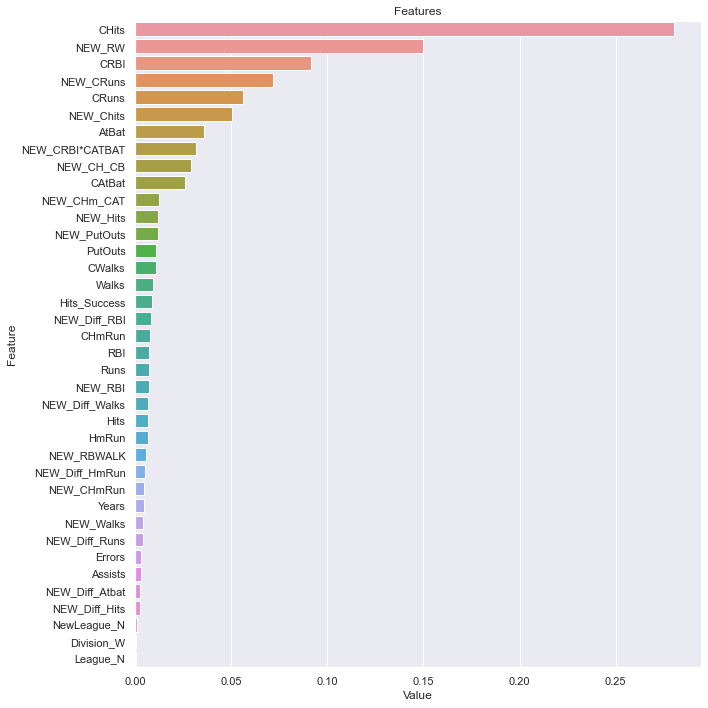

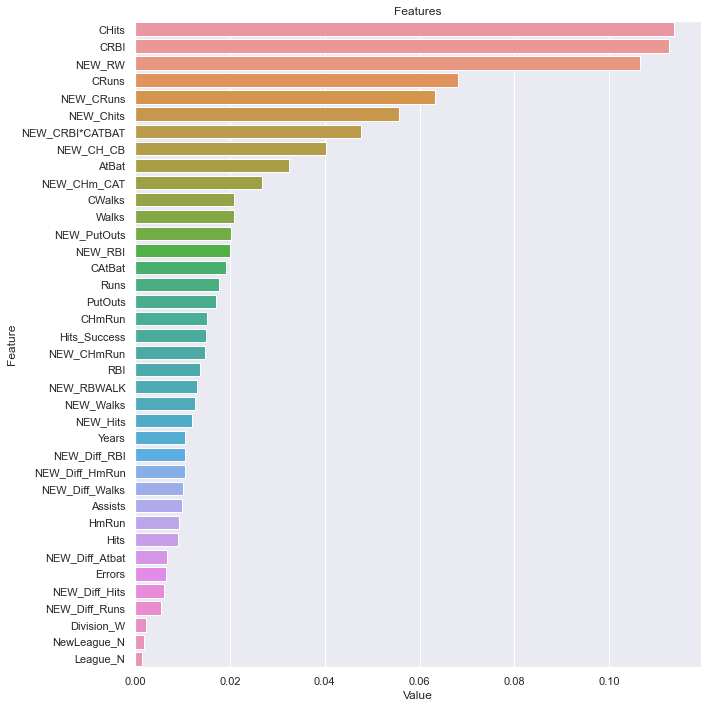

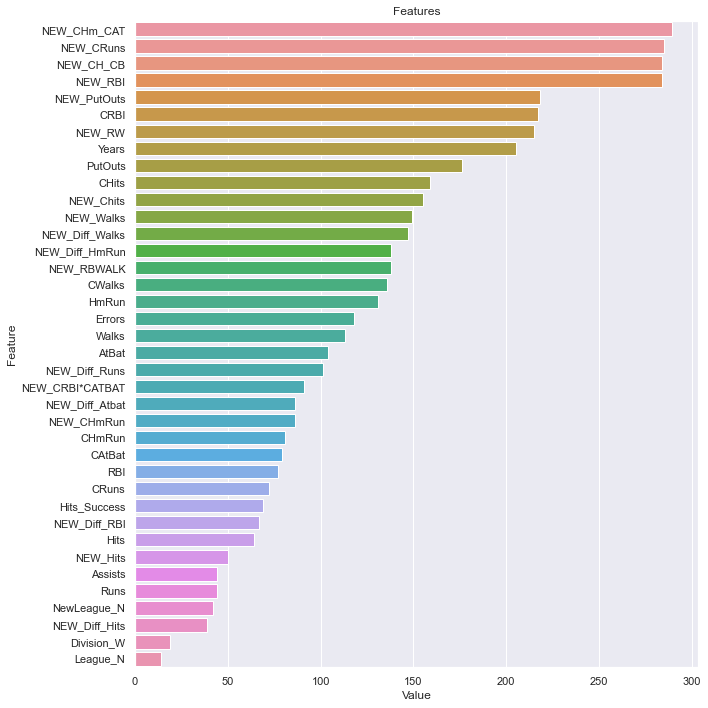

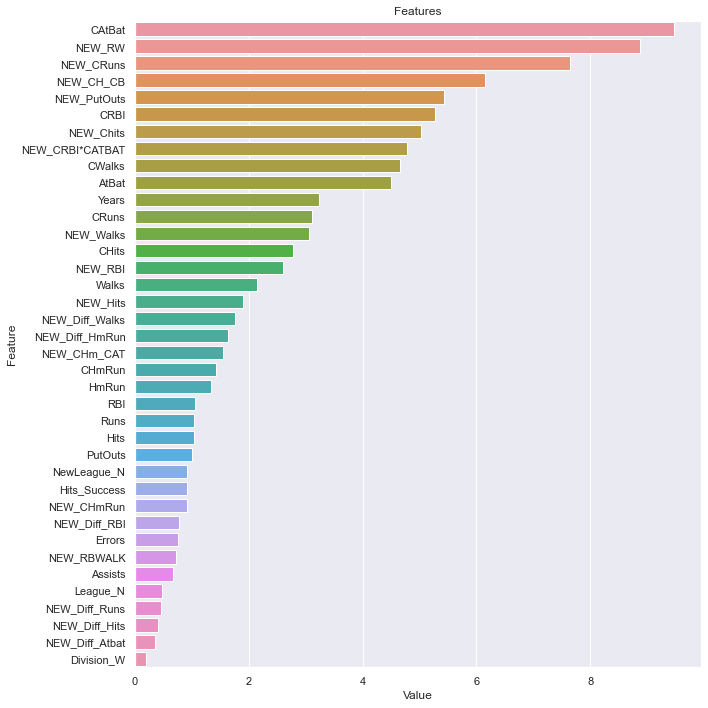

In [29]:
#Feature Importance

def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')


plot_importance(rf_final, X)
plot_importance(gbm_final, X)
plot_importance(lgbm_final, X)
plot_importance(catboost_final, X)

In [31]:
# Analyzing Model Complexity with Learning Curves

def val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=10):
    train_score, test_score = validation_curve(
        model, X=X, y=y, param_name=param_name, param_range=param_range, scoring=scoring, cv=cv)

    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)

    plt.plot(param_range, mean_train_score,
             label="Training Score", color='b')

    plt.plot(param_range, mean_test_score,
             label="Validation Score", color='g')

    plt.title(f"Validation Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.tight_layout()
    plt.legend(loc='best')
    plt.show()

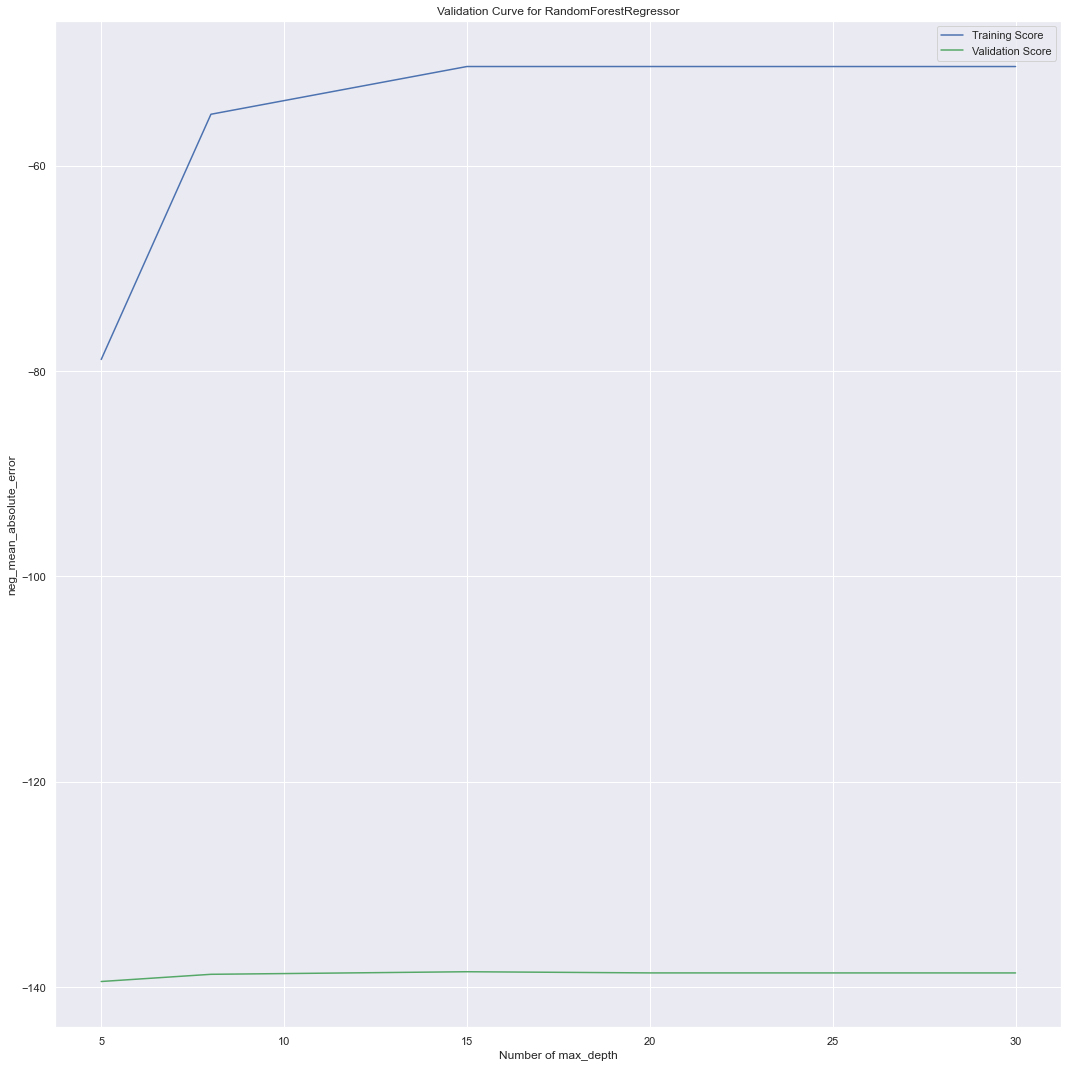

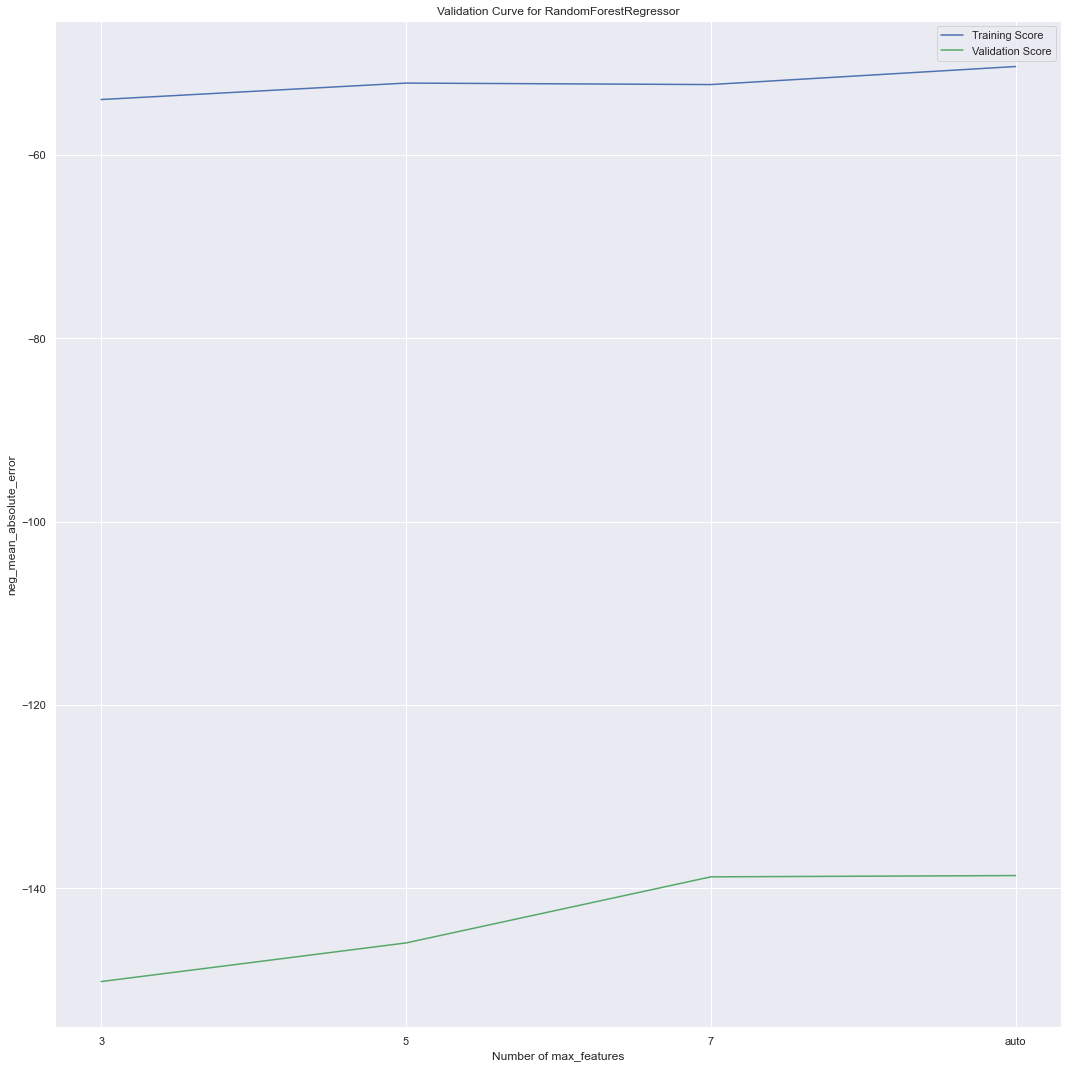

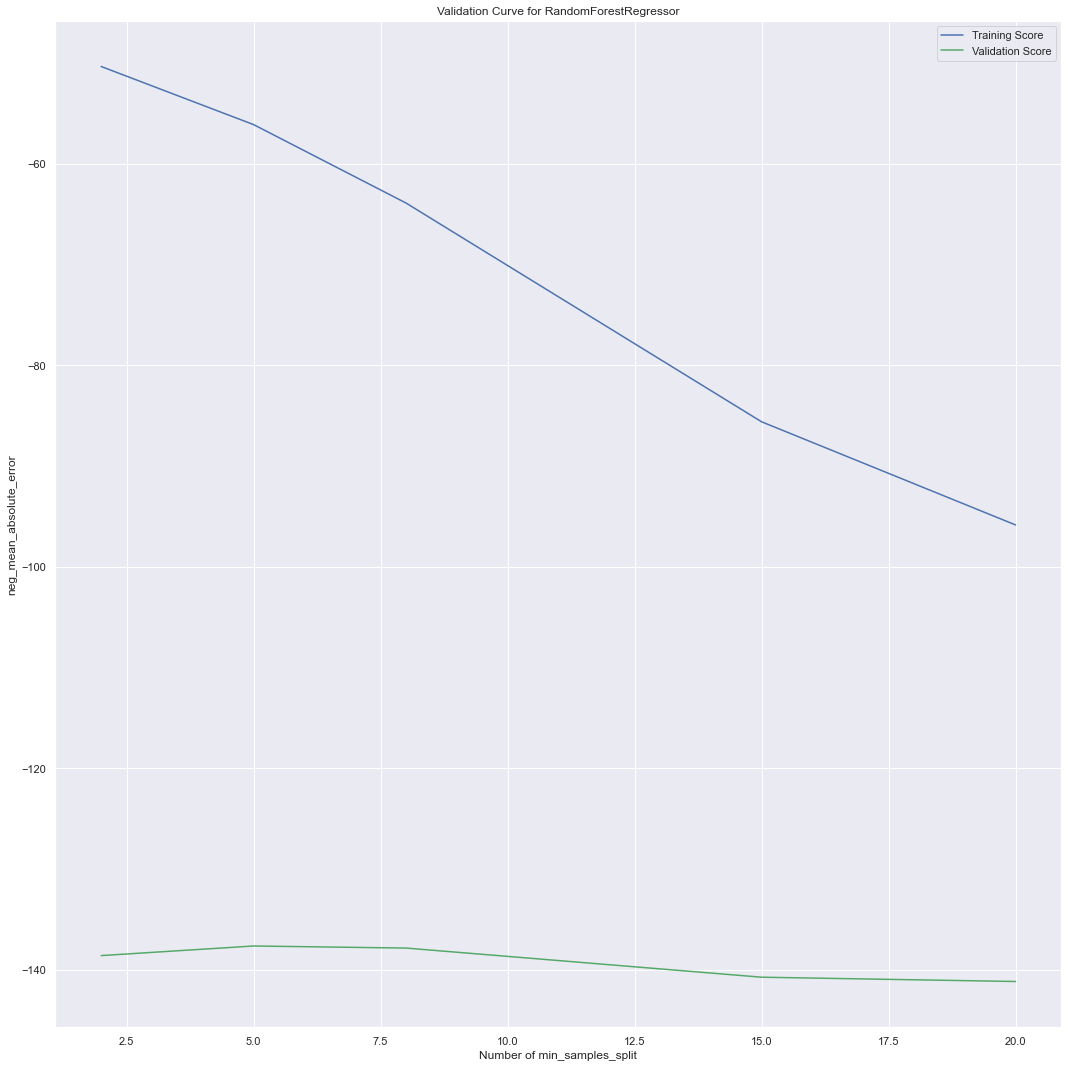

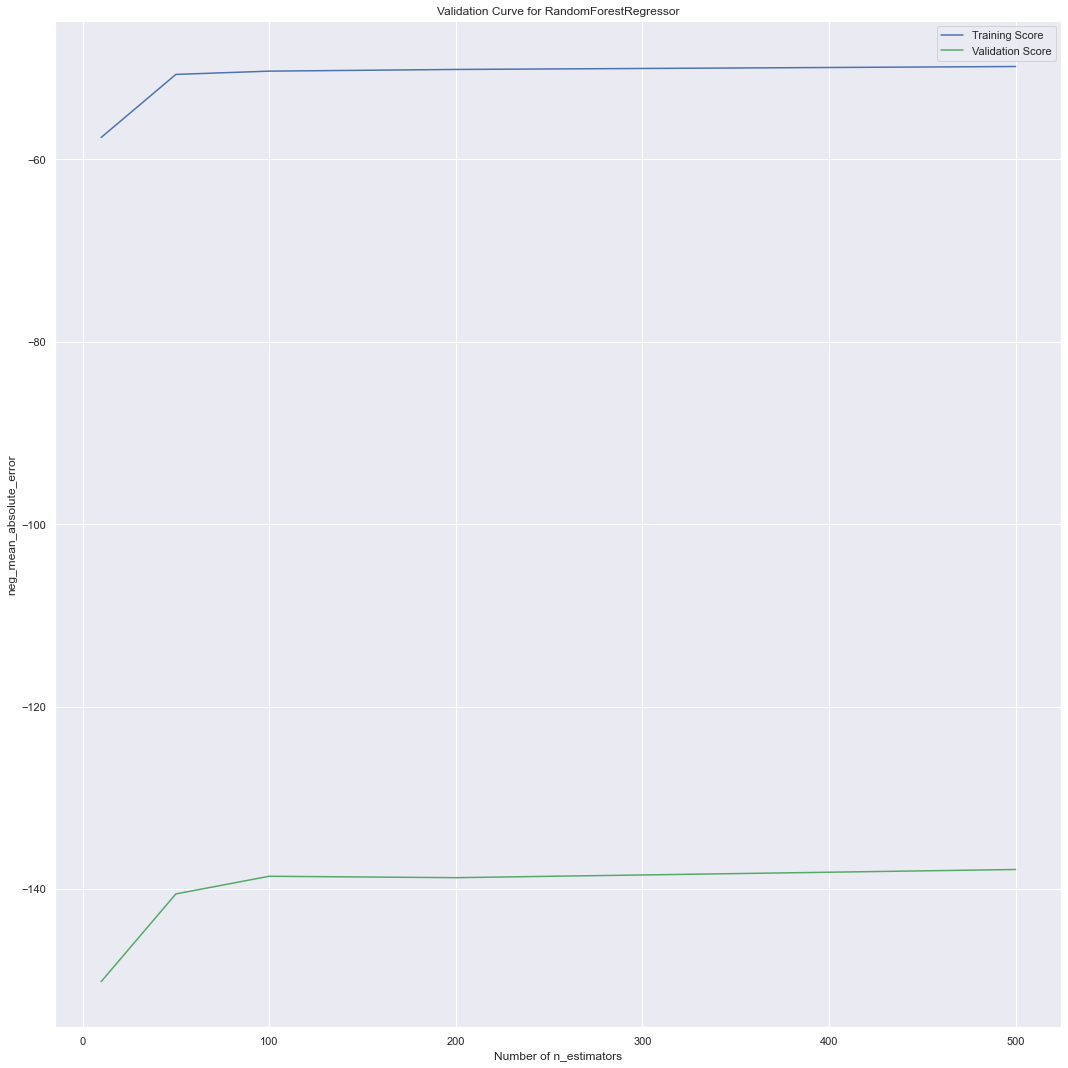

[5, 8, 15, 20, 30, None]

In [32]:
rf_val_params = [["max_depth", [5, 8, 15, 20, 30, None]],
                 ["max_features", [3, 5, 7, "auto"]],
                 ["min_samples_split", [2, 5, 8, 15, 20]],
                 ["n_estimators", [10, 50, 100, 200, 500]]]


rf_model = RandomForestRegressor(random_state=17)

for i in range(len(rf_val_params)):
    val_curve_params(rf_model, X, y, rf_val_params[i][0], rf_val_params[i][1],scoring="neg_mean_absolute_error")

rf_val_params[0][1]